# Проект: Исследование стартапов

- Автор: Пулькина Анастасия


# 0. Введение

<div style="background-color:thistle;">

### Цели и задачи проекта
    
    
</div>

**Целью проекта** - изучение инвестиционного рынка стартапов в целях дальнейшего принятия бизнес-решения о покупке, развитии и последующей перепродаже перспективных стартапов.


Необходимо подготовить датасет и проверить данные, а дале ответить на вопросы заказчика о предобработке и о значении данных для бизнеса.



**Задачи**:
 1. Знакомство с данными: загрузка, предобработка (обработка типа данных и пропусков)  
 2. Предварительное исследование  
    2.1. Раунды финансирования по годам  
    2.2. Люди и их образование  
    2.3. Вопрос объединения таблиц   
    2.4. Причина возникновения пропусков в датасете   
 
 3. Исследовательский анализ объединённых таблиц  
    3.1. Объединение данных  
    3.2. Анализ выбросов  
    3.3. Исследование компаний, проданных за ноль или за один доллар  
    3.4. Распредение цены стартапов по категориям  
    3.5. Типичное значение числа раундов для каждого возможного статуса стартапа  
 4. Итоговый вывод и рекомендации

<div style="background-color:thistle;">

### Знакомство с данными: загрузка и первичная предобработка
    
    
</div>

Для анализа предоставлена данные, которые состоят из следующих файлов:   
 * `acquisition.csv` - информация о покупках одними компаниями других компаний  
 * `company_and_rounds.csv` - информация о о компаниях и раундах финансирования   
 * `people.csv` - информация о сотрудниках
 * `education.csv` - информация об образовании сотрудника
 * `degrees.csv` - информация о о типе образования сотрудника
 
Также опционально предоставлены датасеты: 
 * `fund.csv` - информация о фондах
 * `investment.csv` - информация о раундах инвестирования


**Описание данных**

Таблица `acquisition`

 - `id` — идентификатор покупки.
 - `acquiring_company_id` — идентификатор покупающей компании.
 - `acquired_company_id` — идентификатор покупаемой компании.
 - `term_code` — варианты расчёта.
 - `price_amount` — сумма сделки.
 - `acquired_at` — дата сделки.

Таблица `company_and_rounds`

 - `company ID` — идентификатор компании.
 - `name` — название компании.
 - `category code` — категория области деятельности компании.
 - `status` — статус компании.
 - `founded at` — дата инвестирования.
 - `closed at` — дата закрытия компании.
 - `domain` — официальный сайт компании.
 - `network username` — ник компании в сети.
 - `country code` — код страны компании.
 - `investment rounds` — число инвестиционных раундов - обозначает количество раз, когда компания привлекала внешние инвестиции от венчурных фондов, частных инвесторов или других финансовых институтов. Каждый раунд обычно связан с определённым этапом развития компании и может включать различные типы инвестиций, такие как посевные инвестиции, инвестиции на стадии роста и т. д.
 - `funding rounds` — число раундов финансирования - также относится к количеству этапов, на которых компания получала внешнее финансирование, но этот термин может быть более широким и включать не только венчурные инвестиции, но и другие формы финансирования, такие как государственные гранты, кредиты и т. п. 
 
Оба показателя важны. Чем больше раундов финансирования прошло, тем больше интереса и доверия, вероятно, компания вызвала у инвесторов. Однако это также может указывать на значительные расходы на привлечение капитала и необходимость постоянного внешнего финансирования для поддержания операций.

 - `funding total` — сумма финансирования.
 - `milestones` — вехи финансирования -  контрольная точка, значимый, ключевой момент (например, переход на новую стадию, новый этап в ходе выполнения проекта). Как правило, с этим моментом связано завершение какого-либо ключевого мероприятия, подписание важных документов или любые другие значительные действия, предусмотренные планом проекта. Сдвиг вехи приводит к сдвигу всего проекта.
 - `funding round id` — идентификатор этапа финансирования.
 - `company id` — идентификатор компании.
 - `funded at` — дата финансирования.
 - `funding round type` — тип финансирования.
 - `raised amount` — сумма финансирования.
 - `pre money valuation` — предварительная денежная оценка.
 - `participants` — число участников.
 - `is first round` — является ли раунд первым.
 - `is last round` — является раунд последним.

Таблица `education`

 - `id` — идентификатор записи об образовании.
 - `person_id` — идентификатор работника.
 - `instituition` — название учебного заведения.
 - `graduated_at` — дата получения образования.

Таблица `people`

 - `id` — идентификатор сотрудника.
 - `first_name` — имя сотрудника.
 - `last_name` — фамилия сотрудника.
 - `company_id` — идентификатор компании.
 - `network_username` — ник в социальных сетях.

Таблица `degrees`

 - `id` — идентификатор записи.
 - `object_id` — идентификатор сотрудника.
 - `degree_type` — тип образования.
 - `subject` — специальность.

   

Вероятнее всего, датасеты `acquisition` и `company_and_rounds` могут быть связаны по столбцам с идентификаторами компании. 
Датасет `company_and_rounds` содержит много непонятной информации. Не понятно, чем `investment rounds` (число инвестиционных раундов) отличается от `funding rounds` (число раундов финансирования).
    
Датасеты `education`, `people` и `degrees` содержат информацию о сотрудниках. скорее всего они могут быть связаны по ключам `person_id`, `id` и `object_id` соответственно. 

Таблица `fund` содержит информацию о фондах, при этом названия столбцов совпадабт с названиям столбцев из таблицы `company_and_rounds`. Возможно, таблица `company_and_rounds` - это объединение таблицы `fund` с чем-то еще. 
    
Таблица `investment`содержит информацию о раундах инвестирования и может быть соединен с таблицей `fund` по `fund_id` и `id` соответственно. 
    
</div>


<div style="background-color:thistle;">
    
### Содержимое проекта
</div>

1. [Загрузка и знакомство с данными](#download_data)
2. [Предобработка данных](#data_preprocessing)
3. [Исследовательский анализ данных](#eda)
4. [Итоговый вывод и рекомендации](#summary)
---



<div style="background-color:thistle;">
    
## Загрузка, знакомство с данных и их предобработка
<a id='download_data'></a>
</div>

Начнём с загрузки библиотек и датасетов.

In [1]:
!pip install phik
from phik import phik_matrix

In [2]:
!pip install matplotlib-venn

In [3]:
!pip install missingno

In [4]:
# Импортируем необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from phik import phik_matrix
import missingno as msno
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import numpy as np

In [6]:
pd.set_option('display.float_format', '{:,.2f}'.format)
#.dt.year.astype('Int64')  

In [7]:
# Загрузим все датасеты и сохраним их в аналогичные переменнные
PATH = "https://code.s3.yandex.net/datasets/"

acquisition_df = pd.read_csv(PATH + 'acquisition.csv')
company_and_rounds_df = pd.read_csv(PATH + 'company_and_rounds.csv')
people_df = pd.read_csv(PATH + 'people.csv')
education_df = pd.read_csv(PATH + 'education.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')
fund_df=pd.read_csv(PATH + 'fund.csv')
investment_df = pd.read_csv(PATH + 'investment.csv')

Познакомимся в данными датасетов. Преобразуем тип данных при необходимости и изучим пропуски. Начнем с датасета `acquisition.csv`.

In [8]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [9]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [10]:
# ищем пропуски 
acquisition_df_missing = acquisition_df.copy()           # Делаем копию текущего датасета
missing = pd.DataFrame({
    'Кол-во пропусков': acquisition_df_missing.isnull().sum(), 
    'Доля пропусков': acquisition_df_missing.isnull().mean().round(4)})
           
missing.sort_values(by='Кол-во пропусков', ascending=False).style.background_gradient(cmap='coolwarm')

,Кол-во пропусков,Доля пропусков
term_code,7576,0.805400
acquired_at,29,0.003100
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
price_amount,0,0.000000


Датасет `acquisition.csv` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первого знакомства с данными, названия столбцов соответствуют своему содержанию, стиль соответствует snake_case.
 * столбец `acquired_at` представлен в виде категориальных данных, его надо преобразовать в тип даты. 
 * Можно проверить, возможно ли оптимизировать размерность столбцев `id`, `acquiring_company_id`, `acquired_company_id`

 * В столбцах в варианте рассчета `term_code` и дате сделки `acquired_at` присутствуют пропуски. 80.5% и 0.3% соответственно.  
  

Преобразуем все столбцы.

In [11]:
acquisition_df.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [12]:
for column in ['id', 'acquiring_company_id', 'acquired_company_id', 'price_amount']:
    acquisition_df[column] = pd.to_numeric(acquisition_df[column], downcast='integer')    
    print(f"Тип данных столбца {column} после преобразования:", acquisition_df[column].dtype)

Тип данных столбца id после преобразования: int16
Тип данных столбца acquiring_company_id после преобразования: int32
Тип данных столбца acquired_company_id после преобразования: int32
Тип данных столбца price_amount после преобразования: int64


In [13]:
# Проверим число уникальных значений 
for column in ['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at']:
    print(f'Уникальные значения в столбце {column}:')
    print(acquisition_df[column].sort_values().nunique())
    print()

Уникальные значения в столбце id:
9407

Уникальные значения в столбце acquiring_company_id:
4793

Уникальные значения в столбце acquired_company_id:
9264

Уникальные значения в столбце term_code:
3

Уникальные значения в столбце price_amount:
1037

Уникальные значения в столбце acquired_at:
2627



In [14]:
# Посмотрим на уникальные значения 
for column in ['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at']:
    print(f'Уникальные значения в столбце {column}:')
    print(acquisition_df[column].sort_values().unique())
    print()

Уникальные значения в столбце id:
[    1     7     8 ... 10527 10528 10529]

Уникальные значения в столбце acquiring_company_id:
[     4      5     11 ... 285921 285968 285984]

Уникальные значения в столбце acquired_company_id:
[     4      8      9 ... 285995 286006 286176]

Уникальные значения в столбце term_code:
['cash' 'cash_and_stock' 'stock' nan]

Уникальные значения в столбце price_amount:
[            0             1            11 ...   35000000000   39000000000
 2600000000000]

Уникальные значения в столбце acquired_at:
['1966-03-24' '1967-04-07' '1977-01-01' ... '2013-12-11' '2013-12-12' nan]



Из странных значений могу отметить, что есть сделки, цена которых 0, 1 и 11 доларов что является странной ценой. Возможно, например 0 был использован как "заглушка". Посмотрим на распределение в столбце `price_amount`

In [15]:
acquisition_df.groupby('price_amount')['id'].nunique().sort_values(ascending=False)

price_amount
0                6931
10000000           44
30000000           38
50000000           37
20000000           36
                 ... 
28200000            1
28700000            1
29350000            1
29900000            1
2600000000000       1
Name: id, Length: 1037, dtype: int64

0 больше всего. Так как столбец не содержит пропусков, я бы предположила, что 0 - это заглушка. Исследованию этого будет посвящего одно из последующих заданий. 

In [16]:
acquisition_df['price_amount'].describe()

count               9,407.00
mean          393,296,495.64
std        26,821,978,227.23
min                     0.00
25%                     0.00
50%                     0.00
75%                23,432.00
max     2,600,000,000,000.00
Name: price_amount, dtype: float64

Также возможно этот столбец содержит некорректное значение, которое нужно будет удалить как выброс, потому что он искажает статистику параметра. 

Переведем тип данных в столбце `acquired_at` в формат даты.

In [17]:
acquisition_df['acquired_at'] =  pd.to_datetime(acquisition_df['acquired_at'])
print('Тип данных столбца после преобразования:', acquisition_df['acquired_at'].dtype)

Тип данных столбца после преобразования: datetime64[ns]


Теперь посмотрим на датасет `company_and_rounds.csv`.

In [18]:
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00
3,10.00,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [20]:
# ищем пропуски 
company_and_rounds_df_missing = company_and_rounds_df.copy()           # Делаем копию текущего датасета
missing = pd.DataFrame({
    'Кол-во пропусков': company_and_rounds_df_missing.isnull().sum(), 
    'Доля пропусков': company_and_rounds_df_missing.isnull().mean().round(4)})
           
missing.sort_values(by='Кол-во пропусков', ascending=False).style.background_gradient(cmap='coolwarm')

,Кол-во пропусков,Доля пропусков
closed at,214325,0.984200
funded at,165094,0.758100
is last round,164846,0.757000
is first round,164846,0.757000
participants,164846,0.757000
pre money valuation,164846,0.757000
raised amount,164846,0.757000
funding round type,164846,0.757000
funding round id,164846,0.757000
company id,164846,0.757000


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Попробую</div>

<AxesSubplot:>

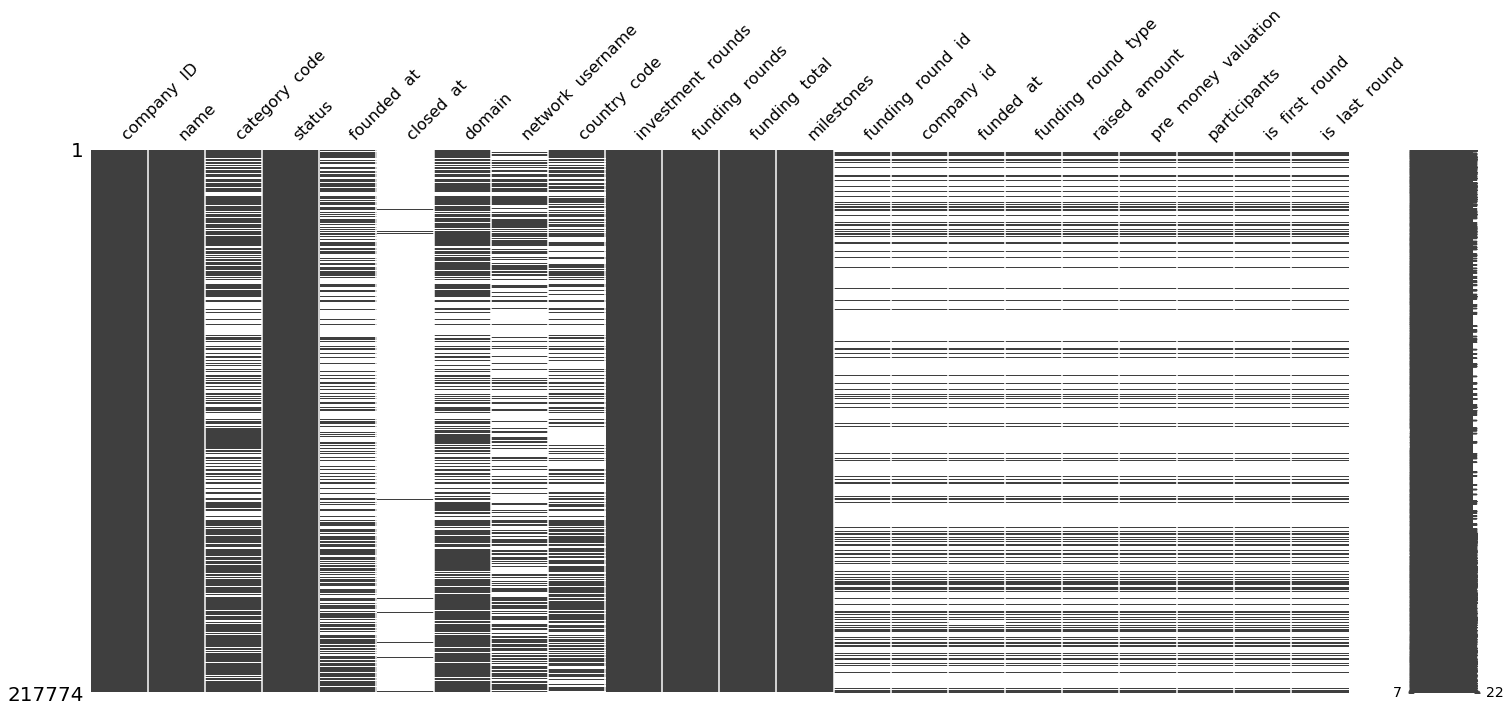

In [21]:
msno.matrix(company_and_rounds_df)

<AxesSubplot:>

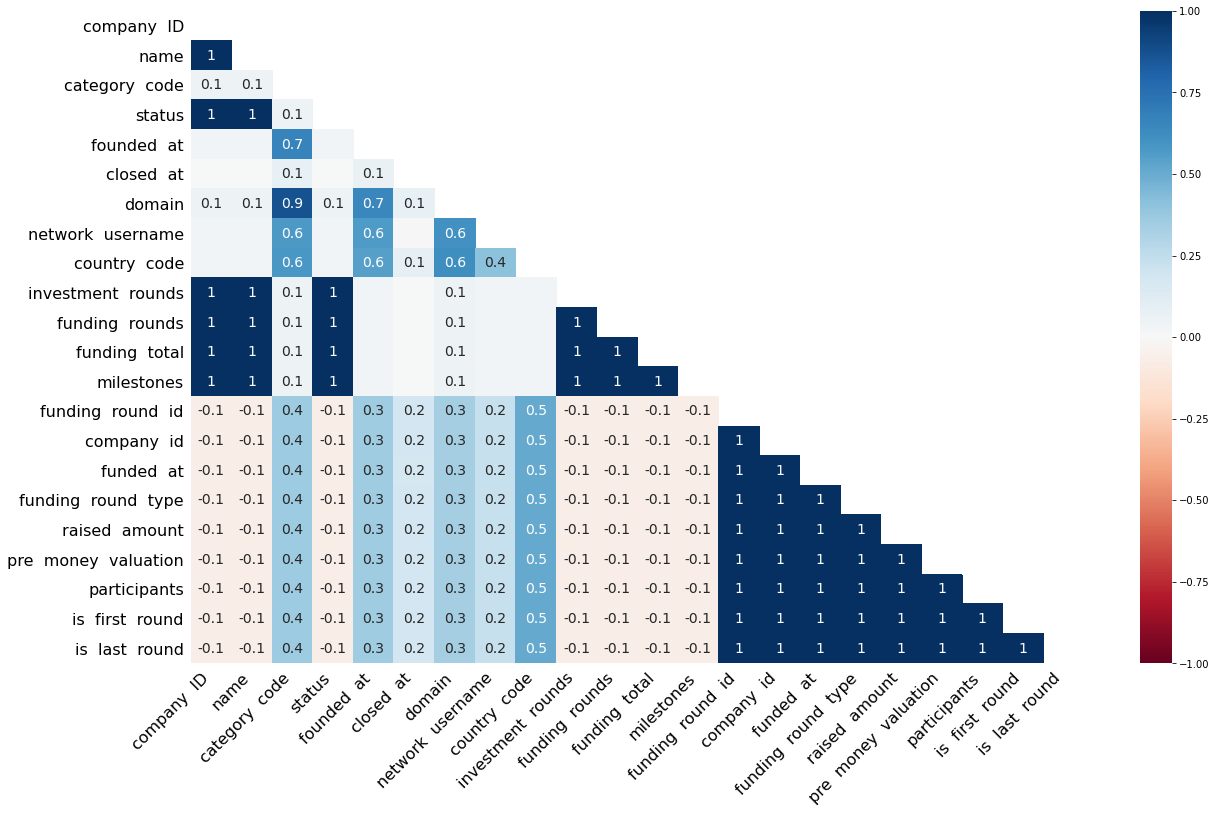

In [22]:
msno.heatmap(company_and_rounds_df)

Датасет `company_and_rounds.csv` состоит из 22 столбцев и 217774 строк.  
Содержит огромное число пропусков. Во всех столбцах есть пропущенные значения. От 0.1% до 98.4%.  
Есть столбцы с повторяющимися названиями. Например `company  ID` и `company  id`. Значения в них храняться в типе чисел с плавающей точкой.   

Необходимо преобразовать стильнаписания столбцов в snake_case.
Необходимо преобразовать в целочисленный тип с понижением разрядности: 
`company ID`, `company  id`, `investment rounds`, `funding rounds`, `funding round id`, `participants`, `is first round`, `is last round`. 

Преобразовать в тип даты: 
`founded at`, `closed at`, `funded at`.





После визуализации пропусков видно, что характер распределения пропусков в столбцах `funding  round  id`, `company  id`, `funded  at`, `funding  round  type`, `raised  amount`, `pre  money  valuation`, `participants`, `is  first  round`, `is  last  round` совпадает. 

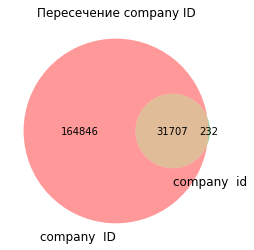

In [23]:
first_id = set(company_and_rounds_df['company  ID'].dropna().unique())
second_id = set(company_and_rounds_df['company  id'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график
plt.title("Пересечение company ID")
plt.show() 


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> </div>

Из диаграммы Венна видим, что подавляющая часть столбца `company  id` совпадает с `company  ID`. Но есть 232 уникальных значения. Тут я подумала, что эти колонки можно объединить, но тогда нам сложно наверно будет эту таблицу в последствии разделить. Оставлю все как есть, добавив еще одну колонку, которая будет содержать все id компаний. 

In [24]:
company_and_rounds_df['company_id'] = company_and_rounds_df['company  ID'].fillna(company_and_rounds_df['company  id'])
company_and_rounds_df.head()                                                            

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round,company_id
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00,1.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00,1.00
3,10.00,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00
4,100.00,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00


In [25]:
company_and_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round', 'company_id'],
      dtype='object')

In [26]:
#company_and_rounds_df = company_and_rounds_df.loc[:,['company_id', 'name', 'category  code', 'status', 
 #                                                    'founded  at','closed  at', 'domain', 'network  username', 
  #                                                   'country  code', 'investment  rounds', 'funding  rounds', 
   #                                                  'funding  total', 'milestones', 'funding  round  id', 
    #                                                 'funded  at', 'funding  round  type', 'raised  amount', 
     #                                                'pre  money  valuation', 'participants', 'is  first  round', 
      #                                               'is  last  round']]

In [27]:
# Поменяем названия столбцев
company_and_rounds_df = company_and_rounds_df.rename(columns = {'company  ID': 'company_ID_company',  
                                                                'category  code': 'category_code', 
                                                                'founded  at': 'founded_at',
                                                                'closed  at': 'closed_at', 
                                                                'network  username': 'network_username', 
                                                                'country  code': 'country_code',
                                                                'investment  rounds': 'investment_rounds', 
                                                                'funding  rounds': 'funding_rounds', 
                                                                'funding  total': 'funding_total', 
                                                                'funding  round  id': 'funding_round_id', 
                                                                'company  id' : 'company_id_rounds',
                                                                'funded  at': 'funded_at',
                                                                'funding  round  type': 'funding_round_type', 
                                                                'raised  amount': 'raised_amount', 
                                                                'pre  money  valuation': 'pre_money_valuation',
                                                                'is  first  round': 'is_first_round', 
                                                                'is  last  round': 'is_last_round'})
#Проверим
company_and_rounds_df.columns

Index(['company_ID_company', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_rounds', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round', 'company_id'],
      dtype='object')

In [28]:
# Преобразуем данные в целочисленный тип с понижением разрядности

for column in ['investment_rounds', 'funding_rounds', 'funding_round_id',  
               'participants', 'is_first_round', 'is_last_round']:   
    #print(f"Тип данных столбца {column} до преобразования:", company_and_rounds_df[column].dtype)
    company_and_rounds_df[column] = company_and_rounds_df[column].astype('Int64')
    company_and_rounds_df[column] = pd.to_numeric(company_and_rounds_df[column], downcast='integer') 
    print(f"Тип данных столбца {column} после преобразования:", company_and_rounds_df[column].dtype)


Тип данных столбца investment_rounds после преобразования: Int64
Тип данных столбца funding_rounds после преобразования: Int64
Тип данных столбца funding_round_id после преобразования: Int64
Тип данных столбца participants после преобразования: Int64
Тип данных столбца is_first_round после преобразования: Int64
Тип данных столбца is_last_round после преобразования: Int64


In [29]:
# преобразуем необходимые столбцы в даты
for column in ['founded_at', 'closed_at', 'funded_at']:
    #print(f"Тип данных столбца {column} до преобразования:", company_and_rounds_df[column].dtype)
    company_and_rounds_df[column] =  pd.to_datetime(company_and_rounds_df[column] )
    print('Тип данных столбца после преобразования:', company_and_rounds_df[column] .dtype)

Тип данных столбца после преобразования: datetime64[ns]
Тип данных столбца после преобразования: datetime64[ns]
Тип данных столбца после преобразования: datetime64[ns]


In [30]:
# Проверим число уникальных значений 
for column in ['company_id', 'name', 'category_code', 'status', 'founded_at',
       #'closed_at', 
               'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round']:
    print(f'Уникальные значения в столбце {column}:')
    print(company_and_rounds_df[column].sort_values().nunique())
    print(company_and_rounds_df[column].sort_values().unique())
    print()

Уникальные значения в столбце company_id:
196785
[1.00000e+00 2.00000e+00 3.00000e+00 ... 2.86212e+05 2.86213e+05
 2.86215e+05]

Уникальные значения в столбце name:
196506
['! Haz Life' '!mpossible'
 '!nterprise Network Services - US West Communications' ... 'Übermind'
 'óga' nan]

Уникальные значения в столбце category_code:
42
['advertising' 'analytics' 'automotive' 'biotech' 'cleantech' 'consulting'
 'design' 'ecommerce' 'education' 'enterprise' 'fashion' 'finance'
 'games_video' 'government' 'hardware' 'health' 'hospitality' 'legal'
 'local' 'manufacturing' 'medical' 'messaging' 'mobile' 'music' 'nanotech'
 'network_hosting' 'news' 'nonprofit' 'other' 'pets' 'photo_video'
 'public_relations' 'real_estate' 'search' 'security' 'semiconductor'
 'social' 'software' 'sports' 'transportation' 'travel' 'web' nan]

Уникальные значения в столбце status:
4
['acquired' 'closed' 'ipo' 'operating' nan]

Уникальные значения в столбце founded_at:
6156
['1901-01-01T00:00:00.000000000' '1902-01-01T

На первый взгляд выделяющихся ошибок в таблице нет, кроме большого числа пропусков. На данном этапе оставим эту таблицу. Поработаем с ней прицельнее в процессе предобработки данных. 

Посмотрим на датасет `people.csv`

In [31]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.00,NaN
1,100,Peter,Lester,27.00,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN
3,10000,Neil,Capel,"2,526.00",NaN
4,100000,Sue,Pilsch,NaN,NaN


In [32]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [33]:
missing_people = pd.DataFrame({
    'Кол-во пропусков': people_df.isnull().sum(), 
    'Доля пропусков': people_df.isnull().mean().round(4)})
           
missing_people.sort_values(by='Кол-во пропусков', ascending=False).style.background_gradient(cmap='coolwarm')

,Кол-во пропусков,Доля пропусков
company_id,192094,0.847300
network_username,187842,0.828600
first_name,5,0.000000
last_name,1,0.000000
id,0,0.000000


<AxesSubplot:>

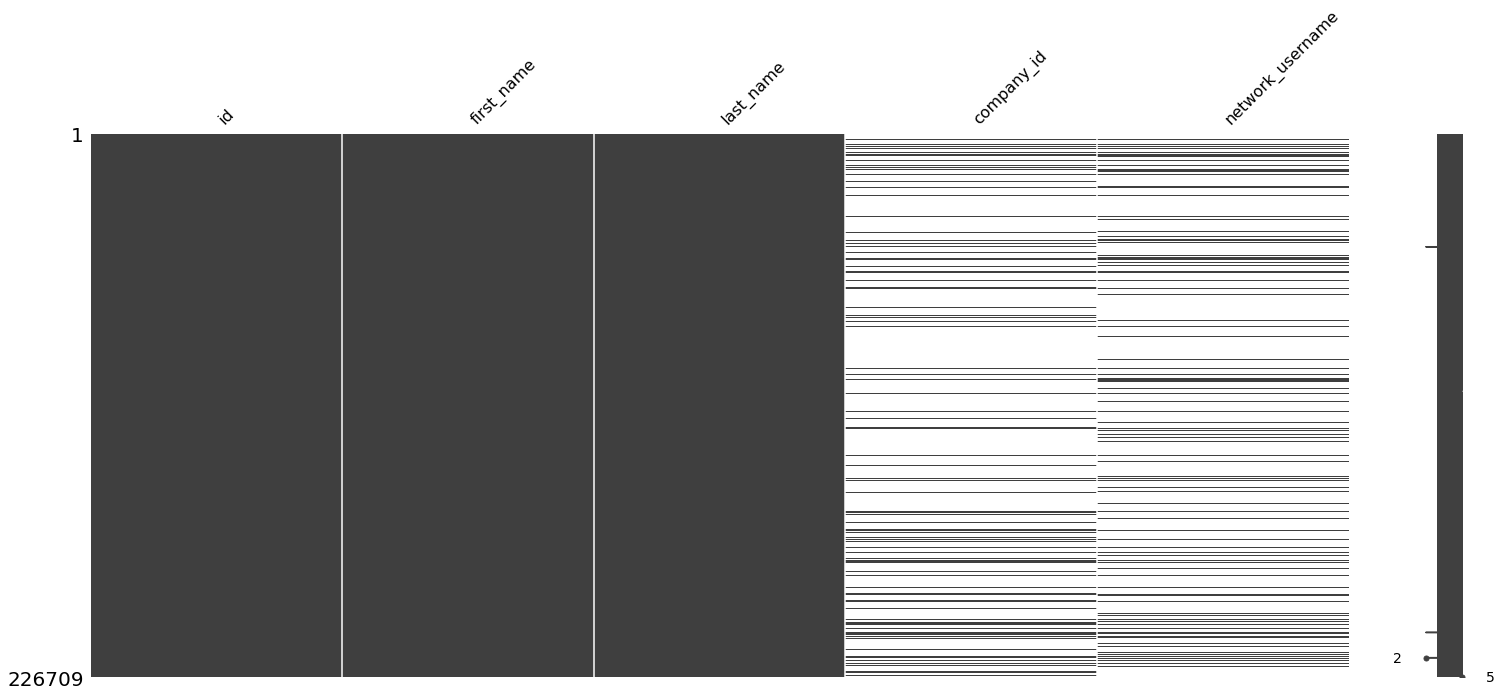

In [34]:
msno.matrix(people_df)

Датасет `people.csv` состоит из 5 столбцев и 226709 строк.  
Снова содержит большое число пропусков. Во всех столбцах, кроме `id` есть пропущенные значения. В столбцах `first_name` и `last_name` их меньше всего - по 4 и 9 пропусков соответственно. В столбце `network_username` 187842 пропусков, что составляет 82.9%. В столбце `company_id` 192094 пропусков (84.7%). Какой-то закономерности в распределении пропусков я не заметила.     

Типы даных и сами соответствуют содержимому, но можно столбец `company_id` преобразовать в целочисленный тип с понижением разрядности. 

In [35]:
people_df['company_id'] = people_df['company_id'].astype('Int64')
people_df['company_id'] = pd.to_numeric(people_df['company_id'], downcast='integer') 
print(f"Тип данных столбца после преобразования:", people_df['company_id'].dtype)

Тип данных столбца после преобразования: Int64


In [36]:
# Посмотрим на уникальные значения в некоторых столбцах 
for column in ['id', 'first_name', 'last_name',
       'company_id', 'network_username']:
    print(f'Уникальные значения в столбце {column}:')
    print(people_df[column].sort_values().nunique())
    print(people_df[column].sort_values().unique())
    print()

Уникальные значения в столбце id:
226708
[     2      3      4 ... 268590 268592 268593]

Уникальные значения в столбце first_name:
28422
['"DJ' '"DUSTY"' '"Diane' ... 'Þórarinn' 'Þórlindur' nan]

Уникальные значения в столбце last_name:
107772
['!llmind' '"Andy" Bell' '"BJ" Jenkins' ... 'å\x91¨å\x93\x81å\x9d\x87'
 'üzüm' nan]

Уникальные значения в столбце company_id:
22922
<IntegerArray>
[     1,      2,      3,      4,      5,      8,      9,     10,     11,
     12,
 ...
 285409, 285446, 285461, 285473, 285897, 285953, 285972, 285996, 286091,
   <NA>]
Length: 22923, dtype: Int64

Уникальные значения в столбце network_username:
38421
['01konceptz' '03199618' '077football' ... 'zz4sheezy' 'zzdoublezz' nan]



Дальше посмотрим на датасет `education.csv`.

In [37]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [38]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [39]:
missing_edu = pd.DataFrame({
    'Кол-во пропусков': education_df.isnull().sum(), 
    'Доля пропусков': education_df.isnull().mean().round(4)})
           
missing_edu.sort_values(by='Кол-во пропусков', ascending=False).style.background_gradient(cmap='coolwarm')

,Кол-во пропусков,Доля пропусков
graduated_at,51556,0.470400
instituition,55,0.000500
id,0,0.000000
person_id,0,0.000000


Датасет `education.csv` состоит из 4 столбцев и 109610 строк.  
Столбец `graduated_at` содержит наибольшее число пропусков - 51556, что составляет 47%. В столбце `instituition` 55 пропусков. 
Столбец `graduated_at` необходимо перевести в тип даты.
Типы даных в остальных столбцах и сами данные соответствуют содержимому, но можно в столбцах `id` и `person_id` понизить разрядность. 

In [40]:
education_df['graduated_at'] =  pd.to_datetime(education_df['graduated_at']) 
print('Тип данных столбца после преобразования:', education_df['graduated_at'].dtype)

Тип данных столбца после преобразования: datetime64[ns]


In [41]:
for column in ['id', 'person_id']:   
    #print(f"Тип данных столбца {column} до преобразования:", education_df[column].dtype)
    education_df[column] = pd.to_numeric(education_df[column], downcast='integer') 
    print(f"Тип данных столбца {column} после преобразования:", education_df[column].dtype)

Тип данных столбца id после преобразования: int32
Тип данных столбца person_id после преобразования: int32


Также посмотрим на датасет `degrees.csv`

In [42]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [43]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [44]:
missing_degree = pd.DataFrame({
    'Кол-во пропусков': degrees_df.isnull().sum(), 
    'Доля пропусков': degrees_df.isnull().mean().round(4)})
           
missing_degree.sort_values(by='Кол-во пропусков', ascending=False).style.background_gradient(cmap='coolwarm')

,Кол-во пропусков,Доля пропусков
subject,28312,0.258300
degree_type,11218,0.102300
id,0,0.000000
object_id,0,0.000000


Датасет `degrees.csv` состоит из 4 столбцев и 109610 строк.  
Столбец `subject` содержит наибольшее число пропусков - 28312, что составляет 25.8%. В столбце `degree_type` 11221 пропусков - 10.2%. 

Типы даных и сами данные соответствуют содержимому. В столбце `id` можно понизить разрядность. Возможно, для объединения с другими таблицами в столбце `object_id` надо будет убрать символы 'p:'.

In [45]:
degrees_df['id'] = pd.to_numeric(degrees_df['id'], downcast='integer') 
print(f"Тип данных столбца после преобразования:", degrees_df['id'].dtype)

Тип данных столбца после преобразования: int32


In [46]:
# Посмотрим на уникальные значения в некоторых столбцах 
for column in ['degree_type', 'subject']:
    print(f'Уникальные значения в столбце {column}:')
    print(degrees_df[column].sort_values().unique())
    print()

Уникальные значения в столбце degree_type:
['!st Class Honors' '"Mini-MBA"' "'A' Levels" ...
 '\x93Diplomkauffrau\x94 degree' '\x96 MBA' nan]

Уникальные значения в столбце subject:
['"Psychology, Religion, and Conflict Negotiations"'
 '( Electrical Engineering), Telecommunications, 3.8/4.0'
 '(1) Marketing, (2) Management' ...
 '| Database Design | Server Administratio'
 '\x95 Bachelor of Commerce, Economics & Law' nan]



Посмотрим на датасет `fund.csv`

In [47]:
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [48]:
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [49]:
fund_df.columns

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

In [50]:
# Посмотрим на уникальные значения в некоторых столбцах 
for column in ['name', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones']:
    print(f'Число уникальных значений в столбце {column}:')
    print(fund_df[column].sort_values().nunique())
    print(f'Уникальные значения в столбце:')
    print(fund_df[column].sort_values().unique())
    print()

Число уникальных значений в столбце name:
11648
Уникальные значения в столбце:
["'RIA Novosti'" '(mt) Ventures' '.406 Ventures' ... 'Östersjöstiftelsen'
 'Østjysk Innovation' nan]

Число уникальных значений в столбце domain:
7231
Уникальные значения в столбце:
['10i10.dk' '10xgreenhouse.com' '10xvp.com' ... 'zylom.com' 'zynik.com'
 nan]

Число уникальных значений в столбце network_username:
2098
Уникальные значения в столбце:
['10xvp' '123Venture' '1BUSDWORLDWIDE' ... 'zionsbank' 'zylom' nan]

Число уникальных значений в столбце country_code:
96
Уникальные значения в столбце:
['ALB' 'ARE' 'ARG' 'AUS' 'AUT' 'AZE' 'BEL' 'BGD' 'BGR' 'BHR' 'BHS' 'BLR'
 'BMU' 'BRA' 'BRB' 'CAN' 'CHE' 'CHL' 'CHN' 'COL' 'CSS' 'CYM' 'CYP' 'CZE'
 'DEU' 'DNK' 'EGY' 'ESP' 'EST' 'FIN' 'FJI' 'FRA' 'GBR' 'GHA' 'GIB' 'GRC'
 'HKG' 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'ISL' 'ISR' 'ITA' 'JOR' 'JPN' 'KEN'
 'KGZ' 'KHM' 'KOR' 'KWT' 'LBN' 'LKA' 'LTU' 'LUX' 'LVA' 'MAR' 'MEX' 'MKD'
 'MLT' 'MUS' 'MYS' 'NGA' 'NLD' 'NOR' 'NPL' 'NZL' 'PA

Таблица fund видимо все-таки не является часть таблицы `company_and_rounds` так как например уникальные значения в столбце `milestones` и `country_code` не совпадают. 

In [51]:
company_and_rounds_df = company_and_rounds_df.replace('nan', np.nan)

In [52]:
fund_df = fund_df.replace('nan', np.nan)


---

### Промежуточный вывод

Первичное знакомство с датасетами позволило предположить, что в датасете `acquisition.csv` в столбце `price_amount` есть значения-заглушки, возможно, есть ошибочное значение, которое можно будет удалить как выброс. 
Датасет `company_and_rounds.csv` самый проблемный. Содержит большое число пропусков, распределение которых можно считать закономерным. В датасете содержится два столбца с идентичными значениями. В совокупности это позволяет предположить, что датасет `company_and_rounds.csv` получен путем соединения двух датасетов. В процессе предобработки был добавлен столбец `company_id`, объединяющий информацию о дублирующихся столбцах. 
Датасеты `people.csv`, `education.csv` и `degrees.csv` также содержат пропуски. 


Во всех датасетах столбцы, содержащие информацию о дате, приведены к типу даты. Также проверена возможность понижения разрядности в столбцах, хранящих целочисленные данные и числа с плавающей точкой. 
На данном этапе работы пропуски я не стала удалять или заполнять средними значениями/"заглушками", так как пропусков очень много и все их надо обработывать, внимательнее изучая данные. 



<div style="background-color:thistle;">
    
## Предобработка данных, предварительное исследование
<a id='data_preprocessing'></a>
</div>


### Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [53]:
company_and_rounds_df.head()

,company_ID_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,company_id
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,888,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2,0,1,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,889,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3,0,0,1.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,2312,1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4,1,0,1.00
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,...,<NA>,NaN,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,10.00
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,...,<NA>,NaN,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,100.00


In [54]:
# Проверяем полные дубликаты в датафрейме df
print("Количество дубликатов:", company_and_rounds_df.duplicated().sum())

Количество дубликатов: 0


In [55]:
# хочу предварительно посмотреть на данные, чтобы понимать, какую характерисику в качесвте средней использовать корректнее. 
# Сделаем это, вызвав функцию describe, а затем построим гистограмму и диаграмму размаха. 
company_and_rounds_df['raised_amount'].describe()

count          52,928.00
mean        7,946,092.26
std        42,168,205.89
min                 0.00
25%           246,330.00
50%         1,600,000.00
75%         6,700,000.00
max     3,835,050,000.00
Name: raised_amount, dtype: float64

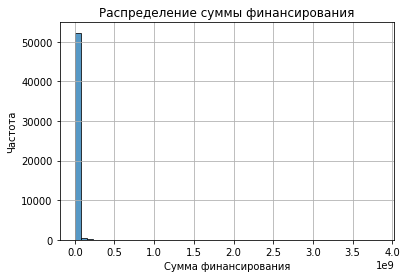

In [56]:
company_and_rounds_df['raised_amount'].plot(
                kind='hist', 
                bins=50,
                alpha=0.75,
                edgecolor='black',
                rot=0, 
)
plt.title('Распределение суммы финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')

plt.grid()
plt.show()

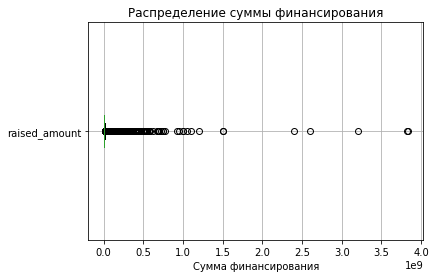

In [57]:
company_and_rounds_df.boxplot(column='raised_amount', vert=False)

plt.title('Распределение суммы финансирования')
plt.xlabel('Сумма финансирования')

plt.show()

Очень большой разброс данных. Среднее значение составляет 7.946092e+06, стандартное отклонение - 4.216821e+07. Медиана - 1.600000e+06. Большой разброс данных - от 0 до 3.835050e+09. При этом при вихуализации данных гистограммой видно, что подавляющее большинство данных имеет значение 0. Возможно, при обработке данных число 0 было использовано в качестве значения-индикатора. 

In [58]:
# Проверяем распределение данных по значениям столбца raised_amount
print('Распределение данных по значениям столбца raised_amount:')
company_and_rounds_df['raised_amount'].value_counts()

Распределение данных по значениям столбца raised_amount:


0.00             6000
1,000,000.00     1555
5,000,000.00     1225
2,000,000.00     1191
10,000,000.00    1171
                 ... 
530,008.00          1
3,369,900.00        1
65,100.00           1
40,404.00           1
92,862.00           1
Name: raised_amount, Length: 10266, dtype: int64

Есть предполодение, что 0 был использован в качестве заглушки там, где не было данных.
Так как в задании написано, "Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета company_and_rounds.csv." Не будем ничего трогать. Оставим данные как есть. 

In [59]:
# Выделим год из даты
company_and_rounds_df['funded_year'] = company_and_rounds_df['funded_at'].dt.year.astype('Int64')  
company_and_rounds_df['funded_year'] 

0         2005
1         2007
2         2008
3         <NA>
4         <NA>
          ... 
217769    2011
217770    2011
217771    2012
217772    2013
217773    2013
Name: funded_year, Length: 217774, dtype: Int64

In [60]:
# Составьте сводную таблицу по годам на основании столбца 'raised_amount'

pivot_comp_rounds = pd.pivot_table(company_and_rounds_df,
                             index='funded_year',
                             values='raised_amount',
                             aggfunc=['mean', 'median', 'count'])

pivot_comp_rounds

,mean,median,count
,raised_amount,raised_amount,raised_amount
funded_year,,,
1960,"5,859,558.89",0.00,9
1973,0.00,0.00,1
1974,0.00,0.00,2
1984,"47,000.00","41,000.00",3
1985,0.00,0.00,1
1987,"1,250,000.00","1,250,000.00",2
1989,"15,000.00","15,000.00",1
1990,"1,000,000.00","1,000,000.00",1


In [61]:
# Оставьте информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

pivot_comp_rounds.columns = ['raised_amount_mean', 'raised_amount_median', 'raised_amount_count', ]
pivot_comp_rounds_50 = pivot_comp_rounds[pivot_comp_rounds['raised_amount_count']>50]
#pivot_comp_rounds_50.sort_values(by = 'raised_amount_median', ascending = False)
#pivot_comp_rounds_50.sort_values(by = 'raised_amount_mean', ascending = False)
#pivot_comp_rounds_50.sort_values(by = 'funded_year', ascending = False)
pivot_comp_rounds_50

,raised_amount_mean,raised_amount_median,raised_amount_count
funded_year,,,
1999,"7,420,241.71","2,000,000.00",76
2000,"11,485,509.14","4,200,000.00",125
2001,"8,761,518.96","3,000,000.00",96
2002,"7,836,195.93","4,200,000.00",116
2003,"5,725,049.59","3,000,000.00",159
2004,"7,593,645.52","5,000,000.00",291
2005,"9,324,876.54","5,500,000.00",1633
2006,"8,404,267.40","5,000,000.00",2436
2007,"8,931,094.37","3,973,320.00",3279


<Figure size 720x720 with 0 Axes>

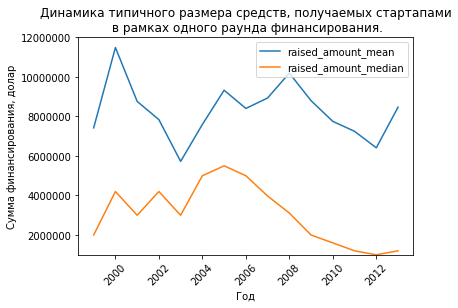

In [62]:
# На основе таблицы постройте график, отражающий динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.
plt.figure(figsize = (10,10))

pivot_comp_rounds_50[['raised_amount_mean', 'raised_amount_median']].plot(kind='line', rot=45)

plt.title('Динамика типичного размера средств, получаемых стартапами\n в рамках одного раунда финансирования.')
plt.xlabel('Год')
plt.ylabel('Сумма финансирования, долар')
plt.ylim(1000000, 12000000)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

 - Максимальный типичный размер собранных в рамках одного раунда средств при расчете медианты был в 2005 году (5500000.0), при расчете по среднему арифметическому - в 2000 году (11,485,509.14	). 

 - Количество раундов в 2013 году продолжает расти и уже составляет 11072. Эта тенденция начала появляется еще в 2001 году. Сумма выделяемых в рамках каждого раунда средств начинает увеличиваться в сравнении с 2012 годом. 

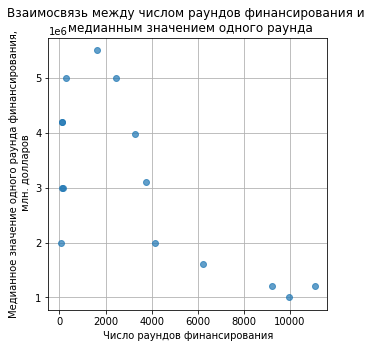

In [63]:
plt.figure(figsize=(5, 5))

plt.plot(pivot_comp_rounds_50['raised_amount_count'],
         pivot_comp_rounds_50['raised_amount_median'],
         marker='o', 
         linestyle='', 
         alpha=0.7)

plt.title('Взаимосвязь между числом раундов финансирования и \n медианным значением одного раунда')
plt.xlabel('Число раундов финансирования')
plt.ylabel('Медианное значение одного раунда финансирования,\n млн. долларов')
plt.grid()


plt.show()

По этому графику можно сказать, что при числе раундов более 2000 наблюдается падение медианы `raised_amount`.


### Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [64]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5,NaN
1,100,Peter,Lester,27,NaN
2,1000,Dr. Steven,E. Saunders,292,NaN
3,10000,Neil,Capel,2526,NaN
4,100000,Sue,Pilsch,<NA>,NaN


In [65]:
# Проверяем полные дубликаты в датафрейме df
print("Количество дубликатов:", people_df.duplicated().sum())

Количество дубликатов: 0


In [66]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT


In [67]:
# Проверяем полные дубликаты в датафрейме df
print("Количество дубликатов:", education_df.duplicated().sum())

Количество дубликатов: 0


In [68]:
peop_merged = people_df.merge(education_df, left_on='id', right_on='person_id', how='left') 
peop_merged_gr = peop_merged.groupby('company_id')['person_id'].agg(['count']).sort_values(by ='count', ascending=False) 
peop_merged_gr.head()

,count
company_id,
59,300
29,181
1242,155
231067,97
4175,82


In [69]:
#peop_merged_gr.plot(
 #               kind='bar', 
  #              alpha=0.75,
   #             edgecolor='black',
    #            rot=0
#)
#plt.title('Распределение числа сотрудников')
#plt.xlabel('Число сотрудников в компании')
#plt.ylabel('Частота')
#plt.yscale('log')

#plt.grid()
#plt.show()

In [70]:
peop_merged

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,"2,415.00",10.00,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,<NA>,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200,network,"25,958.00","174,088.00",Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419,itechsocialnet,"18,871.00","118,386.00",ESCS,2004-01-01
267692,175827,mahesh,kumar,<NA>,socialnethubs,NaN,NaN,NaN,NaT


In [71]:
peop_merged = peop_merged.rename(columns = {'id_x': 'id_people', 'id_y': 'id__education'})

In [72]:
peop_merged[peop_merged[['first_name', 'last_name', 'company_id']].duplicated(keep=False)]

,id_people,first_name,last_name,company_id,network_username,id__education,person_id,instituition,graduated_at
11,100013,Umesh,Singh,<NA>,NaN,"36,786.00","100,013.00",Rutgers University,NaT
12,100013,Umesh,Singh,<NA>,NaN,"36,787.00","100,013.00",University of Mumbai,NaT
15,100016,Thomas,F. Ackerman,<NA>,NaN,NaN,NaN,NaN,NaT
17,100018,Adam,Beckerman,148554,adam_beckerman,"14,433.00","100,018.00","Columbia University, Business School",2004-01-01
18,100018,Adam,Beckerman,148554,adam_beckerman,"14,434.00","100,018.00","University of Maryland, College Park",1996-01-01
...,...,...,...,...,...,...,...,...,...
267685,99997,Peter,Lalonde,83651,peterlalonde,"69,682.00","99,997.00",University of Ottawa,1993-01-01
267686,99997,Peter,Lalonde,83651,peterlalonde,"69,683.00","99,997.00",Concordia University,1991-01-01
267687,99997,Peter,Lalonde,83651,peterlalonde,"69,684.00","99,997.00",John Abbott College,1989-01-01
267692,175827,mahesh,kumar,<NA>,socialnethubs,NaN,NaN,NaN,NaT


In [73]:
unique_peop_merged = peop_merged.drop_duplicates(subset=['first_name', 'last_name', 'company_id'])
unique_peop_merged.head()

,id_people,first_name,last_name,company_id,network_username,id__education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,"2,415.00",10.00,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaT


In [74]:
peop_merged_gr = unique_peop_merged.groupby('company_id').agg({'person_id':'count', 
                                                        'id_people':'count'}).sort_values(by ='person_id', ascending=False) 

peop_merged_gr.head()

,person_id,id_people
company_id,,
59,168,244
29,110,150
1242,101,138
231067,58,72
4175,49,56


In [76]:
peop_merged_gr.columns

Index(['person_id', 'id_people'], dtype='object')

In [77]:
# Разбивать на группы буду на колонке `id_people`. 

peop_merged_gr['company_category']=pd.cut(peop_merged_gr['id_people'], bins = [0, 1, 2, 3, 5, 10, 25, float('inf')], 
                                          labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+'])

peop_merged_gr['company_category'].value_counts()

1        18127
2         2701
3          919
4-5        690
6-10       365
11-25      102
26+         18
Name: company_category, dtype: int64

In [78]:
# Разбивать на группы буду на колонке `id_people`. 
peop_merged_gr['company_category']=pd.cut(peop_merged_gr['id_people'], bins = [0, 1, 2, 4, float('inf')], 
                                          labels = ['1', '2', '3-4', '5+'])

peop_merged_gr = peop_merged_gr.rename(columns = {'person_id' : 'person_id_count',
                                                  'id_people': 'employe_count'})
peop_merged_gr['company_category'].value_counts()

1      18127
2       2701
3-4     1373
5+       721
Name: company_category, dtype: int64

Теперь для каждой компании у нас есть категория. Добавим эту категорию к объединенной таблице.

In [79]:
peop_merged_full = unique_peop_merged.merge(peop_merged_gr, on='company_id', how='left')
peop_merged_full.head()

,id_people,first_name,last_name,company_id,network_username,id__education,person_id,instituition,graduated_at,person_id_count,employe_count,company_category
0,10,Mark,Zuckerberg,5,NaN,"2,415.00",10.00,Harvard University,NaT,45.00,61.00,5+
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT,5.00,10.00,5+
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT,0.00,3.00,3-4
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT,0.00,2.00,2
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [80]:
# напишем функцию, с помощью которой создадим столбец с булевыми значениями о том, есть ли информация об образовании 

def create_is_na(x):
    if x:
        return 0
    return 1


In [81]:
peop_merged_full['is_edu'] = peop_merged_full['instituition'].isna().apply(create_is_na)
peop_merged_full.head()

,id_people,first_name,last_name,company_id,network_username,id__education,person_id,instituition,graduated_at,person_id_count,employe_count,company_category,is_edu
0,10,Mark,Zuckerberg,5,NaN,"2,415.00",10.00,Harvard University,NaT,45.00,61.00,5+,1
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT,5.00,10.00,5+,0
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT,0.00,3.00,3-4,0
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT,0.00,2.00,2,0
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0


In [82]:
# оцените среднюю долю сотрудников без информации об образовании в каждой из групп.

In [83]:
pivot_edu_temp = pd.pivot_table(peop_merged_full,
                             index='company_category',
                             #column = 'is_edu',   
                             values='is_edu',
                             aggfunc=['count', 'mean'])
pivot_edu_temp.columns=[ 'num_of_edu_inform', 'perc_of_edu_inform']
pivot_edu_temp

,num_of_edu_inform,perc_of_edu_inform
company_category,,
1,18127,0.54
2,5402,0.53
3-4,4573,0.51
5+,6491,0.53


По имеющимся данным можно предположить, что полнота сведений о сотрудниках не зависит от их числа и в среднем составляет примерно 50%. 

Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`
Если мы уверены, что числовые идентификаторы в столбце `object_id` соответствуют идентификаторам сотрудников из датасета `people.csv`, то можем их объединить и посмотреть, добавит ли имеющаяся информация новых деталей.

In [84]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [85]:
# модифицируем запись object_id
degrees_df['empl_id'] = degrees_df['object_id'].str.split(':').str[1]
degrees_df['empl_id'] = pd.to_numeric(degrees_df['empl_id'])
degrees_df.head()

,id,object_id,degree_type,subject,empl_id
0,1,p:6117,MBA,NaN,6117
1,2,p:6136,BA,"English, French",6136
2,3,p:6136,MS,Mass Communication,6136
3,4,p:6005,MS,Internet Technology,6005
4,5,p:5832,BCS,"Computer Science, Psychology",5832


In [86]:
peop_degree = people_df.merge(degrees_df, left_on='id', right_on='empl_id', how='left') 
peop_degree.head()

,id_x,first_name,last_name,company_id,network_username,id_y,object_id,degree_type,subject,empl_id
0,10,Mark,Zuckerberg,5,NaN,"2,415.00",p:10,NaN,Computer Science,10.00
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
peop_degree[peop_degree[['first_name', 'last_name', 'company_id']].duplicated(keep=False)]

,id_x,first_name,last_name,company_id,network_username,id_y,object_id,degree_type,subject,empl_id
11,100013,Umesh,Singh,<NA>,NaN,"36,786.00",p:100013,MBA,Finance,"100,013.00"
12,100013,Umesh,Singh,<NA>,NaN,"36,787.00",p:100013,MS,Physical Chemistry,"100,013.00"
15,100016,Thomas,F. Ackerman,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
17,100018,Adam,Beckerman,148554,adam_beckerman,"14,433.00",p:100018,MBA,"Entrepreneurship, Marketing","100,018.00"
18,100018,Adam,Beckerman,148554,adam_beckerman,"14,434.00",p:100018,BS,"Marketing, French","100,018.00"
...,...,...,...,...,...,...,...,...,...,...
267685,99997,Peter,Lalonde,83651,peterlalonde,"69,682.00",p:99997,BA,Communications,"99,997.00"
267686,99997,Peter,Lalonde,83651,peterlalonde,"69,683.00",p:99997,Minor,Economics,"99,997.00"
267687,99997,Peter,Lalonde,83651,peterlalonde,"69,684.00",p:99997,DEC,Communications,"99,997.00"
267692,175827,mahesh,kumar,<NA>,socialnethubs,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Снова строки задублировались из-за того, что один человек мог получать образование в разных учебных заведениях. Нам достаточно одного упоминания, остальные удалим. </div>

In [88]:
unique_peop_degree = peop_degree.drop_duplicates(subset=['first_name', 'last_name', 'company_id'])
unique_peop_degree.head()

,id_x,first_name,last_name,company_id,network_username,id_y,object_id,degree_type,subject,empl_id
0,10,Mark,Zuckerberg,5,NaN,"2,415.00",p:10,NaN,Computer Science,10.00
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


Дальше добавим информацию из датасета `education.csv`.

In [89]:
peop_degree_edu = unique_peop_degree.merge(education_df, left_on='id_x', right_on='person_id', how='left') 
#peop_merged_gr = peop_merged.groupby('company_id')['person_id'].agg(['count']).sort_values(by ='count', ascending=True) 
peop_degree_edu.head()

,id_x,first_name,last_name,company_id,network_username,id_y,object_id,degree_type,subject,empl_id,id,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,"2,415.00",p:10,NaN,Computer Science,10.00,"2,415.00",10.00,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [90]:
# проверим дубликаты по столбцам, позволяющим идентифицировать сотрудника
peop_degree_edu[peop_degree_edu[['first_name', 'last_name', 'company_id']].duplicated(keep=False)]

,id_x,first_name,last_name,company_id,network_username,id_y,object_id,degree_type,subject,empl_id,id,person_id,instituition,graduated_at
11,100013,Umesh,Singh,<NA>,NaN,"36,786.00",p:100013,MBA,Finance,"100,013.00","36,786.00","100,013.00",Rutgers University,NaT
12,100013,Umesh,Singh,<NA>,NaN,"36,786.00",p:100013,MBA,Finance,"100,013.00","36,787.00","100,013.00",University of Mumbai,NaT
17,100018,Adam,Beckerman,148554,adam_beckerman,"14,433.00",p:100018,MBA,"Entrepreneurship, Marketing","100,018.00","14,433.00","100,018.00","Columbia University, Business School",2004-01-01
18,100018,Adam,Beckerman,148554,adam_beckerman,"14,433.00",p:100018,MBA,"Entrepreneurship, Marketing","100,018.00","14,434.00","100,018.00","University of Maryland, College Park",1996-01-01
38,100049,Mike,Cannady,63,NaN,"32,494.00",p:100049,MBA,"Entertainment, Media & Technology and Corporat...","100,049.00","32,494.00","100,049.00",New York University (NYU),NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255904,99994,Kiran,Manda,<NA>,NaN,"102,502.00",p:99994,Computer Science,MS,"99,994.00","102,502.00","99,994.00",University of Louisiana,NaT
255905,99994,Kiran,Manda,<NA>,NaN,"102,502.00",p:99994,Computer Science,MS,"99,994.00","102,503.00","99,994.00","University of Madras, India",NaT
255908,99997,Peter,Lalonde,83651,peterlalonde,"69,682.00",p:99997,BA,Communications,"99,997.00","69,682.00","99,997.00",University of Ottawa,1993-01-01
255909,99997,Peter,Lalonde,83651,peterlalonde,"69,682.00",p:99997,BA,Communications,"99,997.00","69,683.00","99,997.00",Concordia University,1991-01-01


In [91]:
# удалим их
unique_peop_degree_edu = peop_degree_edu.drop_duplicates(subset=['first_name', 'last_name', 'company_id'])
unique_peop_degree_edu.head()

,id_x,first_name,last_name,company_id,network_username,id_y,object_id,degree_type,subject,empl_id,id,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,"2,415.00",p:10,NaN,Computer Science,10.00,"2,415.00",10.00,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [92]:
# переименуем столбцы
unique_peop_degree_edu = unique_peop_degree_edu.rename(columns = {'id_x': 'id_people', 'id_y': 'id__degree'})
unique_peop_degree_edu.head()

,id_people,first_name,last_name,company_id,network_username,id__degree,object_id,degree_type,subject,empl_id,id,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,"2,415.00",p:10,NaN,Computer Science,10.00,"2,415.00",10.00,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [93]:
# создадим столбец, который будет содержать 1, если есть данные хотя бы в одном из столбцев и 0, если информации об образовании нет совсем
def create_is_edu(x):
    if pd.isna(x['degree_type']) and pd.isna(x['instituition']) and pd.isna(x['subject']):
        return 0
    else:
        return 1

# Создаём новый столбец
unique_peop_degree_edu['is_edu'] = unique_peop_degree_edu.apply(create_is_edu, axis = 1)

In [94]:
# Снова проверим, 

unique_peop_degree_edu[unique_peop_degree_edu[['first_name', 'last_name', 'company_id']].duplicated(keep=False)]

,id_people,first_name,last_name,company_id,network_username,id__degree,object_id,degree_type,subject,empl_id,id,person_id,instituition,graduated_at,is_edu


In [95]:
# Разобъем компании на категории. 
unique_peop_degree_edu_gr = unique_peop_degree_edu.groupby('company_id').agg({'id_people':'count',
                                                                'empl_id':'count',
                                                                'person_id':'count'}).sort_values(by = 'id_people', ascending = False)
unique_peop_degree_edu_gr['company_category']=pd.cut(unique_peop_degree_edu_gr['id_people'], bins = [0, 1, 2, 4, float('inf')], 
                                          labels = ['1', '2', '3-4', '5+'])


unique_peop_degree_edu_gr['company_category'].value_counts()

1      18127
2       2701
3-4     1373
5+       721
Name: company_category, dtype: int64

In [96]:
#добавим категории компании
unique_peop_degree_edu = unique_peop_degree_edu.merge(unique_peop_degree_edu_gr, on='company_id', how='left')
unique_peop_degree_edu.head()

,id_people_x,first_name,last_name,company_id,network_username,id__degree,object_id,degree_type,subject,empl_id_x,id,person_id_x,instituition,graduated_at,is_edu,id_people_y,empl_id_y,person_id_y,company_category
0,10,Mark,Zuckerberg,5,NaN,"2,415.00",p:10,NaN,Computer Science,10.00,"2,415.00",10.00,Harvard University,NaT,1,61.00,45.00,45.00,5+
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0,10.00,5.00,5.00,5+
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0,3.00,0.00,0.00,3-4
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0,2.00,0.00,0.00,2
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN


In [97]:
pivot_degree_edu = pd.pivot_table(unique_peop_degree_edu,
                             index='company_category',
                             #column = 'is_edu',   
                             values='is_edu',
                             aggfunc=['count', 'mean'])
pivot_degree_edu.columns=[ 'num_of_edu_inform', 'perc_of_edu_inform']
pivot_degree_edu

,num_of_edu_inform,perc_of_edu_inform
company_category,,
1,18127,0.54
2,5402,0.53
3-4,4573,0.51
5+,6491,0.54


### Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` встречается в датасетах `people.csv` и `company_and_rounds.csv`. Я хочу вытащить уникальные пары значений `company_id` и `network_username` из каждого датасета. Объединить и проверить, схожи ли образованные пары.



Значит, использовать столбцы с именем `network_username` для объединения данных нельзя.</font>

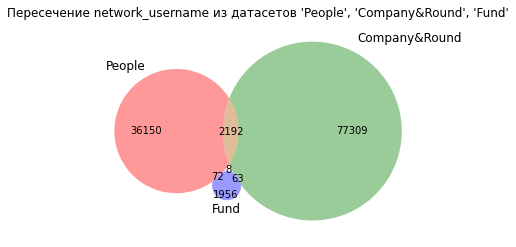

In [103]:
from matplotlib_venn import  venn3 

set_people = set(people_df['network_username'])
set_company_round = set(company_and_rounds_df['network_username'])
set_fund = set(fund_df['network_username'])

# Строим диаграмму Венна
venn3([set_people, set_company_round, set_fund], set_labels=('People', 'Company&Round', 'Fund'))

# Отображаем график
plt.title("Пересечение network_username из датасетов 'People', 'Company&Round', 'Fund'")
plt.show()
 

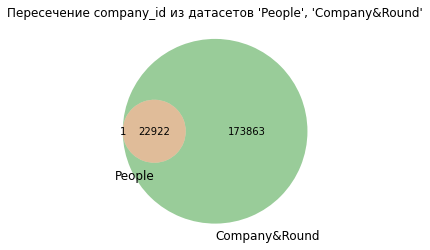

In [104]:
set_people_id = set(people_df['company_id'])
set_company_round_id = set(company_and_rounds_df['company_id'])

# Строим диаграмму Венна
venn2([set_people_id, set_company_round_id], set_labels=('People', 'Company&Round'))

# Отображаем график
plt.title("Пересечение company_id из датасетов 'People', 'Company&Round'")
plt.show()
 


### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [105]:
company_and_rounds_df.head()

,company_ID_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,company_id_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,company_id,funded_year
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2,0,1,1.00,2005
1,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3,0,0,1.00,2007
2,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4,1,0,1.00,2008
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,...,NaN,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,10.00,<NA>
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,...,NaN,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,100.00,<NA>


Скорее всего представленная нам таблица состоит из двух - таблица о компаниях и таблица раундах. Поэтому и `company_ID` стало два столбца. Объединение было сделано outer. 

In [106]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID_company   217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [107]:
company_df = company_and_rounds_df.loc[:, ['company_ID_company', 'name', 'category_code', 'status', 'founded_at',
                                           'closed_at', 'domain', 'network_username', 'country_code',
                                           'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']]


In [108]:
company_df.duplicated().sum()

21220

In [109]:
company_df = company_df.drop_duplicates(keep='first', inplace=False)
company_df = company_df.reset_index(drop=True)
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196554 entries, 0 to 196553
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   company_ID_company  196553 non-null  float64       
 1   name                196553 non-null  object        
 2   category_code       123186 non-null  object        
 3   status              196553 non-null  object        
 4   founded_at          91227 non-null   datetime64[ns]
 5   closed_at           2620 non-null    datetime64[ns]
 6   domain              126545 non-null  object        
 7   network_username    80591 non-null   object        
 8   country_code        87990 non-null   object        
 9   investment_rounds   196553 non-null  Int64         
 10  funding_rounds      196553 non-null  Int64         
 11  funding_total       196553 non-null  float64       
 12  milestones          196553 non-null  float64       
dtypes: Int64(2), datetime64[ns](2

In [110]:
round_df = company_and_rounds_df.loc[:, ['funding_round_id', 'company_id_rounds', 'funded_at',
                                        'funding_round_type', 'raised_amount', 'pre_money_valuation',
                                        'participants', 'is_first_round', 'is_last_round']]

round_df.duplicated().sum()


164845

In [111]:
round_df = round_df.drop_duplicates(keep='first', inplace=False)
round_df = round_df.reset_index(drop=True)
round_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52929 entries, 0 to 52928
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  Int64         
 1   company_id_rounds    52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  Int64         
 7   is_first_round       52928 non-null  Int64         
 8   is_last_round        52928 non-null  Int64         
dtypes: Int64(4), datetime64[ns](1), float64(3), object(1)
memory usage: 3.8+ MB


Разделили данные на два датасета. Данные подготовлены так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.


##  Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [112]:
# отфильтруем из полученного ранее датасета, содержащего информацию о компаниях, 
# только те, у которых либо в столбце 'funding_rounds' есть данные 
# либо в столбце 'investment_rounds' не ноль, либо у которых в колонке status указано acquired

filtered_company_df = company_df[(company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0) | (company_df['status'] == 'acquired')]
filtered_company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_ID_company  40747 non-null  float64       
 1   name                40747 non-null  object        
 2   category_code       35315 non-null  object        
 3   status              40747 non-null  object        
 4   founded_at          27807 non-null  datetime64[ns]
 5   closed_at           2128 non-null   datetime64[ns]
 6   domain              35754 non-null  object        
 7   network_username    20850 non-null  object        
 8   country_code        34742 non-null  object        
 9   investment_rounds   40747 non-null  Int64         
 10  funding_rounds      40747 non-null  Int64         
 11  funding_total       40747 non-null  float64       
 12  milestones          40747 non-null  float64       
dtypes: Int64(2), datetime64[ns](2), float64(3), o

Получившаяся таблица содержит 40747 компаний. 

In [113]:
# посмотрим на пропуски

missing_filtered_company = pd.DataFrame({
    'Кол-во пропусков': filtered_company_df.isnull().sum(), 
    'Доля пропусков': filtered_company_df.isnull().mean().round(4)})
           
missing_filtered_company.sort_values(by='Кол-во пропусков', ascending=False).style.background_gradient(cmap='coolwarm')

,Кол-во пропусков,Доля пропусков
closed_at,38619,0.947800
network_username,19897,0.488300
founded_at,12940,0.317600
country_code,6005,0.147400
category_code,5432,0.133300
domain,4993,0.122500
company_ID_company,0,0.000000
name,0,0.000000
status,0,0.000000
investment_rounds,0,0.000000


Больше всего пропусков в столбце "closed_at". Значит, 95% изучаемых нами компаний не закрыты. В 49% отсутствуют данные о нике компании в сети, я считаю что эта информация неважная в данном случае, как и 'country_code' (15% пропусков), 'domain' (12%). В 32% данных отстутствует информация о дате основания компании. 

<AxesSubplot:>

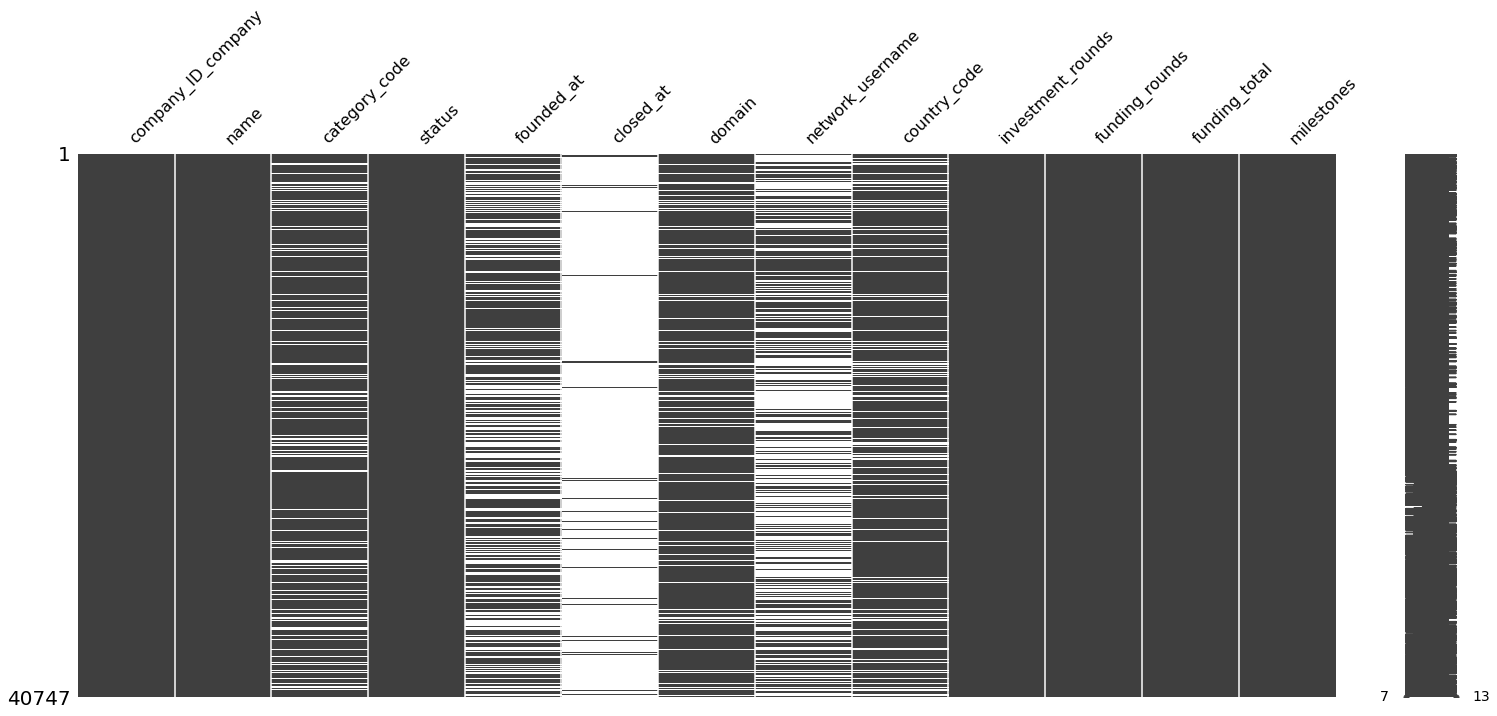

In [114]:
# посмотрим еще на такую красивую матрицу
msno.matrix(filtered_company_df)

По которой дополнительно ничего сказать не могу

In [115]:
# Чтобы проверить корректность данных, посмотрю на значения 
for column in ['company_ID_company', 'name', 'category_code', 'status', 'founded_at',
       #'closed_at', 
               'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']:
    print(f'Уникальные значения в столбце {column}:')
    print(filtered_company_df[column].sort_values().nunique())
    print(filtered_company_df[column].sort_values().unique())
    print()


Уникальные значения в столбце company_ID_company:
40747
[1.00000e+00 4.00000e+00 5.00000e+00 ... 2.86186e+05 2.86200e+05
 2.86215e+05]

Уникальные значения в столбце name:
40747
['"Canal do Credito"' '#waywire' '(In)Touch Network' ... 'Écho Capital'
 'Østjysk Innovation  A/S' 'ÜberResearch']

Уникальные значения в столбце category_code:
42
['advertising' 'analytics' 'automotive' 'biotech' 'cleantech' 'consulting'
 'design' 'ecommerce' 'education' 'enterprise' 'fashion' 'finance'
 'games_video' 'government' 'hardware' 'health' 'hospitality' 'legal'
 'local' 'manufacturing' 'medical' 'messaging' 'mobile' 'music' 'nanotech'
 'network_hosting' 'news' 'nonprofit' 'other' 'pets' 'photo_video'
 'public_relations' 'real_estate' 'search' 'security' 'semiconductor'
 'social' 'software' 'sports' 'transportation' 'travel' 'web' nan]

Уникальные значения в столбце status:
4
['acquired' 'closed' 'ipo' 'operating']

Уникальные значения в столбце founded_at:
2622
['1901-01-01T00:00:00.000000000' '1902

Таким образом, как я понимаю, мы получили список из более чем 40тыс. компаний, которые получали инвестиции или финансирование, и, по мнению заказчика, это означает, что в этих компаниях есть интерес  покупке или продаже компании.
Датасет был отфильтрован по наличию информации о числе раундов финансирования "funding_rounds", или "investment_rounds" более 0 или статусе "acquired".

Данные выглядят корректными.


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

(1, 5700000000.0)

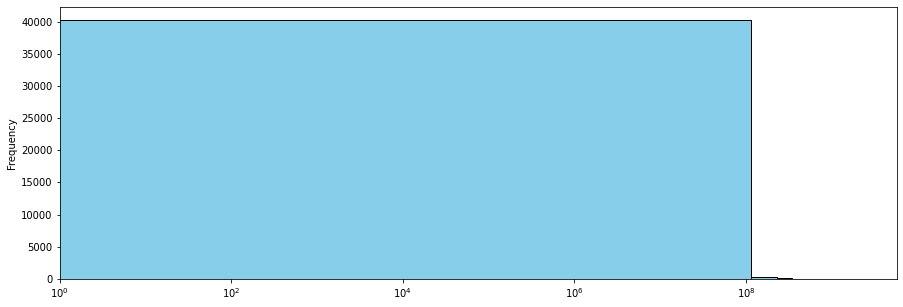

In [116]:
# Посмотрим на распределение в столбце funding_total
plt.figure(figsize = (15, 5))
filtered_company_df['funding_total'].plot(kind='hist', bins = 50, color='skyblue', edgecolor='black')
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlim(1, filtered_company_df['funding_total'].max())


Примерно до 10^8 распределение будто равномерное. 

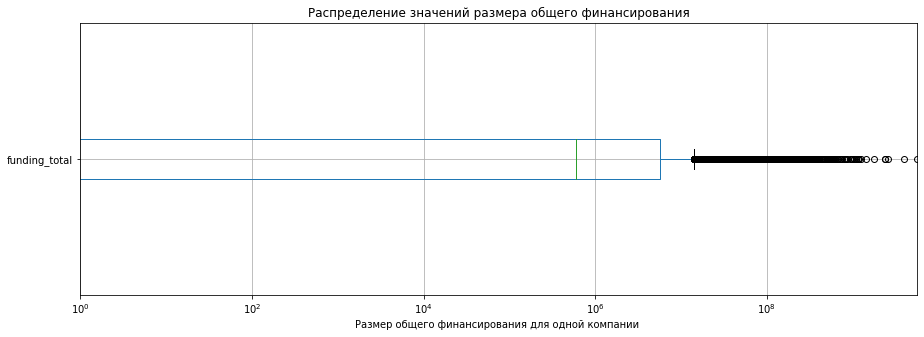

In [117]:
#Построим диаграмму размаха
plt.figure(figsize = (15, 5))
filtered_company_df.boxplot(column = 'funding_total', vert = False, showfliers=True)
plt.title('Распределение значений размера общего финансирования')
plt.xlabel('Размер общего финансирования для одной компании ')
plt.gca().set_xscale('log')

plt.xlim(1, filtered_company_df['funding_total'].max())

plt.show()


Сделала логарифмическую шкалу, чтобы было лучше хоть что-то видно. Видно, что медианное значение близко к 10^6. 

In [118]:
filtered_company_df['funding_total'].describe()

count          40,747.00
mean       10,135,609.64
std        56,464,359.98
min                 0.00
25%                 0.00
50%           600,000.00
75%         5,650,650.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

Среднее значение общего объема финансирования 10,135,609.64, тогда как медиана - 600,000.00. Стандартное отклонение - 56,464,359.98. Распределение имеет большой правый хвост и размах от 0 до 5,700,000,000.00. Так как есть значение в районе 4,000,000,000.00, я бы не назвала эти данные ошибочными.  

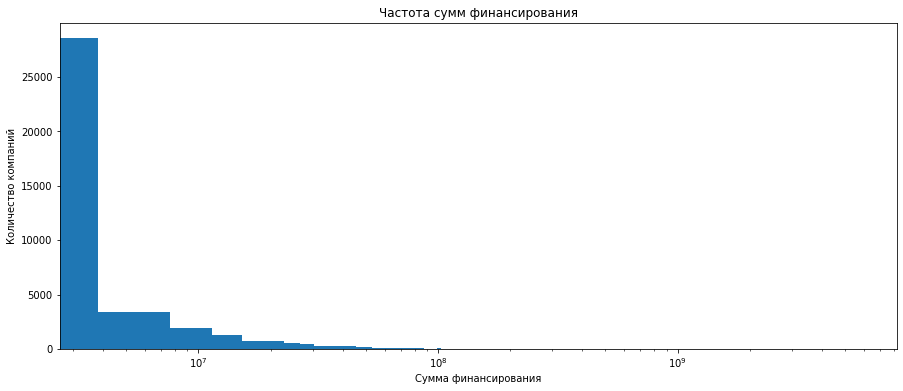

In [119]:
#value_counts = filtered_company_df['funding_total'].value_counts()

plt.figure(figsize=(15, 6))
filtered_company_df['funding_total'].plot(kind='hist', 
                                         bins = 1500)

plt.title('Частота сумм финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний')
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')

plt.show()

In [120]:
filtered_company_df.columns

Index(['company_ID_company', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones'],
      dtype='object')

Видим, что, в 12873 случаях сумма финансирования 'funding_total' равна 0. Не уверена, что сумма 0 - адекватная сумма. Посмотрим, с чем это может быть связанно. 

In [121]:
cor_matrix = filtered_company_df[['category_code', 'status', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']].phik_matrix()


print('Корреляционная матрица с коэффициентом phi_k для переменной общей суммы финансирования')
cor_matrix.loc[cor_matrix.index != 'funding_total'][['funding_total']].sort_values(by='funding_total', ascending=False)

interval columns not set, guessing: ['investment_rounds', 'funding_rounds', 'funding_total', 'milestones']
Корреляционная матрица с коэффициентом phi_k для переменной общей суммы финансирования


,funding_total
funding_rounds,0.19
milestones,0.09
status,0.09
category_code,0.06
country_code,0.00
investment_rounds,0.00


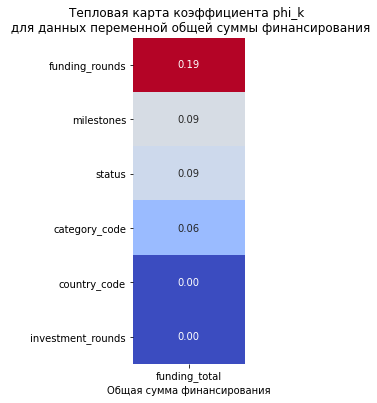

In [122]:
plt.figure(figsize=(2,6))
data_heatmap = cor_matrix.loc[cor_matrix.index != 'funding_total'][['funding_total']].sort_values(by='funding_total', ascending=False)
sns.heatmap(data_heatmap,
           annot = True, 
           fmt='.2f', 
           cmap = 'coolwarm',
           cbar = False
           )

plt.title('Тепловая карта коэффициента phi_k \n для данных переменной общей суммы финансирования')
plt.xlabel('Общая сумма финансирования')

plt.show()

Есть низкая корреляция с раундом финансирования. 

Дальше я подумала, не убрать ли нам 0. Убрала, ничего хорошего из этого не вышло. 

Нулевой общий объём финансирования в контексте стартапов и инвестиций означает, что компания не привлекла никаких внешних средств для своего развития. Это может быть связано с несколькими причинами:

 - Стартап находится на начальной стадии развития, и её основатели ещё не приступили к активным действиям по привлечению инвестиций.
 - Финансирование осуществляется за счёт собственных средств.
 - Отсутствие интереса со стороны инвесторов.

Посмотрим на компании, в которых 0 общий объем финансирования. 

In [123]:
funding_total_zero = filtered_company_df[filtered_company_df['funding_total']==0]
funding_total_zero['funding_rounds'].unique()

<IntegerArray>
[0, 1, 2, 5, 4, 3, 6]
Length: 7, dtype: Int64

In [124]:
funding_total_temp = filtered_company_df[filtered_company_df['funding_total']!=0]
funding_total_temp['funding_rounds'].unique()

<IntegerArray>
[3, 1, 5, 2, 7, 4, 6, 8, 10, 9, 13, 11, 15, 14, 12]
Length: 15, dtype: Int64

Видимо 0 говорит, что компания находится на каких-то ранних этапах. 

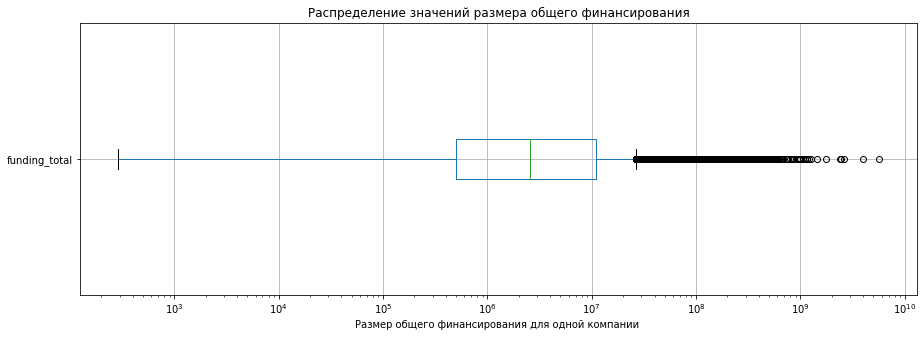

In [125]:
#Построим диаграмму размаха
plt.figure(figsize = (15, 5))
funding_total_temp.boxplot(column = 'funding_total', vert = False)
plt.title('Распределение значений размера общего финансирования')
plt.xlabel('Размер общего финансирования для одной компании ')
plt.gca().set_xscale('log')

plt.show()

In [126]:
funding_total_temp['funding_total'].describe()

count          27,874.00
mean       14,816,520.27
std        67,759,363.12
min               291.00
25%           500,000.00
50%         2,564,500.00
75%        11,000,000.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

Чистка нулей ни к чему особо не привела. 
Среднее значение для такого распределения использовать не корректно. будем оперировать медианой. До удаления 0 из столбца 'funding_total' медиана составляла 600,000.00, что можно назвать наиболее типичным размером финансирования для одной компании. После удаления 0 медианное значение возрасло и составило уже 2,564,500.00. Различия очень заметны. Это объясняется тем, что в датасете было большое число 0. К сожалению, я не эксперт в этой области и не понимаю, может ли данный столбец содержать 0. 


### Куплены за бесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [127]:
# достанем компании, для которых стоимость их покупки составила 0 или 1 доллар
acquisition_df_zero=acquisition_df[(acquisition_df['price_amount'].isin([0, 1]))]
acquisition_df_zero.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
6,12,5,230,cash,0,2007-07-01
7,14,318,314,cash,0,2006-10-01
13,20,377,100,cash,0,2005-05-29
15,23,307,306,cash,0,2007-08-07
21,30,541,542,cash,0,2006-01-01


In [128]:
# ранее я выделила из датасета о компаниях только те, для которых funding_total отличался от нуля. 
# Здесь я просто переименовываю таблицу, чтобы самой понимать что это
company_not_zero = funding_total_temp
company_not_zero.head()

,company_ID_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,"39,750,000.00",5.00
13,"1,001.00",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,"5,000,000.00",3.00
19,"10,015.00",Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,5,"68,069,200.00",0.00
20,"100,155.00",MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0,3,"10,125,300.00",1.00
24,"10,018.00",Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0,3,"33,000,000.00",3.00


In [129]:
# объединяю эти отфильтрованные таблицы
acquised_zero_company = acquisition_df_zero.merge(company_not_zero, left_on='acquired_company_id', right_on = 'company_ID_company',   how='inner') 
acquised_zero_company.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_ID_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,14,318,314,cash,0,2006-10-01,314.00,Reddit,web,acquired,2005-01-01,NaT,reddit.com,reddit,USA,0,1,"100,000.00",3.00
1,65,146,698,cash,0,2007-08-01,698.00,Maya's Mom,web,acquired,NaT,NaT,mayasmom.com,NaN,USA,0,1,"1,000,000.00",2.00
2,67,156,718,cash,0,2007-08-01,718.00,Glimpse,ecommerce,acquired,NaT,NaT,glimpse.com,NaN,USA,0,1,"4,000,000.00",0.00
3,87,1035,175,cash,0,2007-10-01,175.00,Newsvine,web,acquired,2005-03-31,NaT,newsvine.com,NaN,USA,0,1,"1,250,000.00",0.00
4,115,396,1582,cash,0,2007-12-01,"1,582.00",BeliefNet,web,acquired,2008-01-01,NaT,beliefnet.com,eliefnet,USA,0,1,"7,000,000.00",3.00


In [130]:
acquised_zero_company.duplicated().sum() # проверяю дубликаты

0

In [131]:
# Проверяем неявные дубликаты 
print("Количество дубликатов:", acquised_zero_company.duplicated(subset=['company_ID_company']).sum())

Количество дубликатов: 25


In [132]:
# Проверяем неявные дубликаты 
print("Количество дубликатов:", acquised_zero_company.duplicated(subset=['company_ID_company', 'acquired_at']).sum())

Количество дубликатов: 4


In [133]:
acquised_zero_company[acquised_zero_company[['company_ID_company', 'acquired_at']].duplicated(keep=False)]

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_ID_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
815,6773,42590,25307,cash_and_stock,0,2012-01-13,"25,307.00","ORCA, Inc.",ecommerce,acquired,2008-01-01,NaT,orcaone.com,orcaone,USA,0,1,"2,000,000.00",2.00
816,6832,150328,25307,cash_and_stock,0,2012-01-13,"25,307.00","ORCA, Inc.",ecommerce,acquired,2008-01-01,NaT,orcaone.com,orcaone,USA,0,1,"2,000,000.00",2.00
1053,8050,162922,41236,NaN,0,2012-12-21,"41,236.00",Bloomspot,ecommerce,acquired,NaT,NaT,bloomspot.com,bloomspot,USA,0,4,"51,050,000.00",2.00
1054,10313,52102,41236,NaN,0,2012-12-21,"41,236.00",Bloomspot,ecommerce,acquired,NaT,NaT,bloomspot.com,bloomspot,USA,0,4,"51,050,000.00",2.00
1344,9699,528,139762,NaN,0,2013-09-25,"139,762.00",Kanbox,enterprise,acquired,NaT,NaT,kanbox.com,NaN,CHN,0,1,"20,000,000.00",1.00
1345,9705,211687,139762,NaN,0,2013-09-25,"139,762.00",Kanbox,enterprise,acquired,NaT,NaT,kanbox.com,NaN,CHN,0,1,"20,000,000.00",1.00
1582,10293,9947,17758,NaN,0,2013-11-12,"17,758.00",TRAFFIQ,advertising,acquired,2006-09-06,NaT,traffiq.com,TRAFFIQ,USA,0,3,"18,000,000.00",3.00
1583,10402,278945,17758,NaN,0,2013-11-12,"17,758.00",TRAFFIQ,advertising,acquired,2006-09-06,NaT,traffiq.com,TRAFFIQ,USA,0,3,"18,000,000.00",3.00


In [135]:
company_df[company_df[['name', 'founded_at', 'network_username']].duplicated(keep=False)]

,company_ID_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
57558,"200,243.00",Canal do Crédito,consulting,operating,NaT,NaT,canaldocredito.com.br,canaldocredito,NaN,0,0,0.00,1.00
62256,"205,899.00",BBOescape,games_video,operating,2013-03-30,NaT,bboescape.com,NaN,CAN,0,0,0.00,1.00
62259,"205,900.00",BBOescape,games_video,operating,2013-03-30,NaT,bboescape.com,NaN,CAN,0,0,0.00,1.00
65174,"209,131.00",Insight,NaN,operating,NaT,NaT,NaN,NaN,NaN,0,0,0.00,1.00
68797,"212,993.00",Canal do Crédito,consulting,operating,NaT,NaT,canaldocredito.com.br,canaldocredito,NaN,0,0,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130331,"274,700.00",Walmoo,NaN,operating,NaT,NaT,walmoo.com,NaN,NaN,0,0,0.00,0.00
133908,"278,267.00",Insight,NaN,operating,NaT,NaT,NaN,NaN,NaN,0,0,0.00,0.00
137428,"281,816.00",FlightHike,travel,operating,2013-05-01,NaT,flighthike.com,FlightHike,USA,0,0,0.00,1.00
137429,"281,817.00",FlightHike,travel,operating,2013-05-01,NaT,flighthike.com,FlightHike,USA,0,0,0.00,1.00


In [136]:
acquised_zero_company=acquised_zero_company.drop_duplicates(subset = ['company_ID_company', 'acquired_at'], keep = 'first', inplace = False)
acquised_zero_company.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_ID_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,14,318,314,cash,0,2006-10-01,314.00,Reddit,web,acquired,2005-01-01,NaT,reddit.com,reddit,USA,0,1,"100,000.00",3.00
1,65,146,698,cash,0,2007-08-01,698.00,Maya's Mom,web,acquired,NaT,NaT,mayasmom.com,NaN,USA,0,1,"1,000,000.00",2.00
2,67,156,718,cash,0,2007-08-01,718.00,Glimpse,ecommerce,acquired,NaT,NaT,glimpse.com,NaN,USA,0,1,"4,000,000.00",0.00
3,87,1035,175,cash,0,2007-10-01,175.00,Newsvine,web,acquired,2005-03-31,NaT,newsvine.com,NaN,USA,0,1,"1,250,000.00",0.00
4,115,396,1582,cash,0,2007-12-01,"1,582.00",BeliefNet,web,acquired,2008-01-01,NaT,beliefnet.com,eliefnet,USA,0,1,"7,000,000.00",3.00


In [137]:
# посмотрим на показатели столбца funding_total в полученном датасете
acquised_zero_company['funding_total'].describe()

count           1,614.00
mean       18,141,538.06
std       144,679,204.03
min             3,750.00
25%         2,000,000.00
50%         6,000,000.00
75%        15,469,225.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

In [138]:
# Находим первый и третий квартили
Q1 = acquised_zero_company['funding_total'].quantile(0.25)
Q3 = acquised_zero_company['funding_total'].quantile(0.75)

# Рассчитываем межквартильный размах
IQR = Q3 - Q1
lower_bound = max(0, Q1 - 1.5 * (Q3 - Q1))
print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {Q3 + 1.5 * (Q3 - Q1)}")

Нижняя граница выбросов: 0
Верхняя граница выбросов: 35673062.5


В представленном датасете есть компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. Достала эти компании и посмотрела, какой у них общий объем финансирования. 

Верхняя и нижняя границы -  35673062.5
 и 0 соответственно. 
Среднее значение - 144,679,204.03 медианное - 6,000,000.00. 


### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [140]:
# объединию таблицы, содержащие информацию о компаниях и о покупках компаний. Уберу те, в которых цена покупки отмечена как 0. 
acquised_company = company_df.merge(acquisition_df, left_on='company_ID_company', right_on = 'acquired_company_id',   how='inner')
acquised_company=acquised_company[acquised_company['price_amount']!=0]
acquised_company.head()

,company_ID_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.00,0.00,1,11,10,NaN,20000000,2007-05-30
2,"1,001.00",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,"5,000,000.00",3.00,1901,5,1001,cash_and_stock,47500000,2009-08-10
9,"1,007.00",Rupture,games_video,acquired,NaT,NaT,rupture.com,rupture,USA,0,1,"3,000,000.00",2.00,2186,851,1007,cash,15000000,2008-05-08
23,"101,519.00",Vidacare,hardware,acquired,NaT,NaT,vidacare.com,NaN,USA,0,1,"274,999.00",0.00,10214,65984,101519,NaN,262500000,2013-10-29
24,"10,158.00",StudioNow,photo_video,acquired,2007-01-01,NaT,studionow.com,NaN,USA,0,3,"15,286,400.00",1.00,2923,351,10158,cash_and_stock,36500000,2010-01-25


 Посмотрим на распределение цены

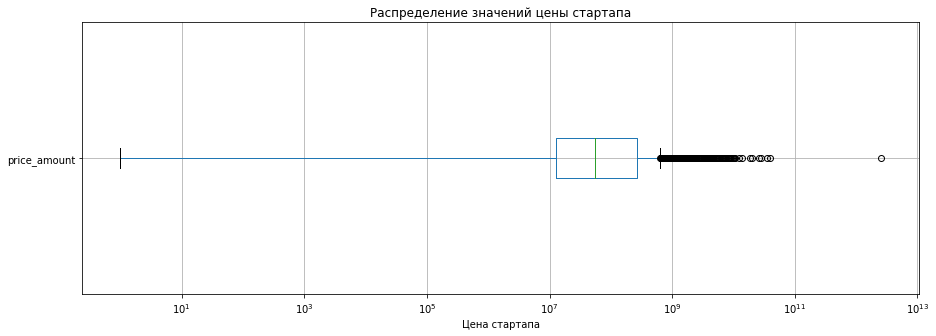

In [141]:
plt.figure(figsize = (15, 5))
acquised_company.boxplot(column = 'price_amount', vert = False)
plt.title('Распределение значений цены стартапа')
plt.xlabel('Цена стартапа')
plt.gca().set_xscale('log')

plt.show()

Скореее всего это выброс.  Буду иметь в виду. Сделаю агрегацию не только по медиане, но и по количеству событий в одной группе. Чтобы быть уверенной, что в категории не одно вот это выбивающееся значение и оно не испортит нам все. 

In [142]:
acquised_company_temp = acquised_company.groupby('category_code').agg({'price_amount': ['median', 'count']})
acquised_company_temp.sort_values(by = ('price_amount', 'median'), ascending = False)

price_amount      
                       median count
category_code                      
automotive         2400000000     3
sports              622500000     2
nanotech            584000000     1
real_estate         400000000     6
manufacturing       351000000    21
transportation      230000000     3
biotech             200000000   263
analytics           200000000     3
fashion             195000000     3
cleantech           185000000    39
finance             171500000    20
medical             165000000     4
security            164500000    36
ecommerce           157500000    50
health              140000000    10
public_relations    110000000    74
network_hosting     102500000    64
messaging           100000000     5
semiconductor       100000000    71
search               90000000    19
hardware             76000000    78
other                71550000    84
travel               62500000     4
advertising          60000000    84
games_video          58250000    88
hospitality          57500000     7
mobile               56000000   117
web                  55500000   260
enterprise           54750000   116
photo_video          50000000     5
software             48140000   403
social               45750000     4
news                 40000000     9
consulting           32150000    32
education            16250000     6
local                16140200     1
music                 4860000     3

 Распределение стартапов по группам очень разное. Наверно, их не совсем корректно сравнивать между собой. Особенно те, где по одному - два события ('sports', 'nanotech' и 'local'). Такие выборки не репрезентативные. Однако цифры в этих группах на первый взгляд не вызывают вопросов. Наверно эти категории было бы хорошо с чем-то объединить. Но не будем фантазировать, будем об этом помнить. 

In [143]:
#перепроверю стартапы из группы 'automotive', так как они выбиваются своими высокими значениями
acquised_company[acquised_company['category_code']=='automotive']

,company_ID_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
3104,"243,452.00",Invensys,automotive,acquired,NaT,NaT,invensys.com,NaN,GBR,0,0,0.00,1.00,9218,31041,243452,NaN,5200000000,2013-07-31
4038,"272,359.00",General Parts International,automotive,acquired,2004-01-01,NaT,NaN,NaN,USA,0,0,0.00,0.00,10004,85736,272359,cash,2400000000,2013-10-16
6667,"51,342.00",Zhijiang Jonway Automobile,automotive,acquired,NaT,NaT,jonwayauto.com,NaN,CHN,0,1,"29,030,000.00",0.00,3684,29371,51342,cash_and_stock,43000000,2010-07-02


Вопросов к этой группе у меня нет. Вызывает доверие.

In [144]:
# посмотрим на медианное значение для каждой категории
acquised_company.groupby('category_code')['price_amount'].median().sort_values(ascending = False)#.head(15)

category_code
automotive          2400000000
sports               622500000
nanotech             584000000
real_estate          400000000
manufacturing        351000000
transportation       230000000
biotech              200000000
analytics            200000000
fashion              195000000
cleantech            185000000
finance              171500000
medical              165000000
security             164500000
ecommerce            157500000
health               140000000
public_relations     110000000
network_hosting      102500000
messaging            100000000
semiconductor        100000000
search                90000000
hardware              76000000
other                 71550000
travel                62500000
advertising           60000000
games_video           58250000
hospitality           57500000
mobile                56000000
web                   55500000
enterprise            54750000
photo_video           50000000
software              48140000
social                457

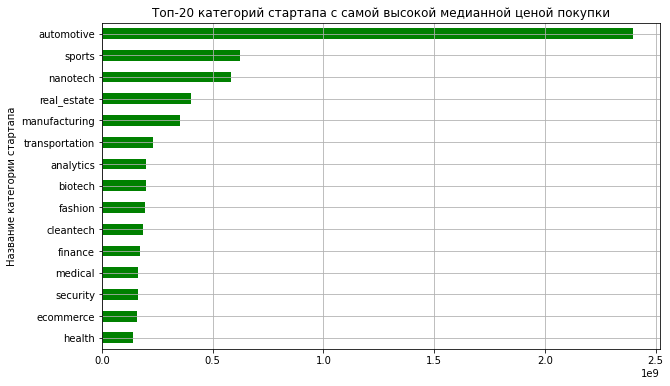

In [145]:
# Посмотри на топ 15 катерогрий стартапов, для которых отмечена самая выскоая типичная стоимость его покупки
grouped_cat = acquised_company.groupby('category_code')['price_amount'].median().sort_values(ascending = False).head(15)
grouped_cat= grouped_cat.sort_values(ascending = True)
grouped_cat.plot(kind='barh',
                   title='Топ-20 категорий стартапа с самой высокой медианной ценой покупки',
                   legend=False,
                   ylabel='Цена покупки',
                   xlabel="Название категории стартапа",
                   rot=0,
                   figsize=(10, 6),
                   color='green')

plt.grid()
plt.show()


In [146]:
# Выделим топ-15 категорий с наибольшей разницей в стоимости покупки.
# для этого выделим максимальную и минимальную для каждой категории, посчитаем размах.
grouped_range = acquised_company.groupby('category_code').agg({'price_amount': [lambda x: np.percentile(x, 90), lambda x: np.percentile(x, 10), 'max', 'min']})
grouped_range.columns = ['90th_percentile', '10th_percentile', 'max', 'min']
grouped_range['range'] = grouped_range[('90th_percentile')] - grouped_range[('10th_percentile')]

grouped_range = grouped_range.sort_values(by = 'range', ascending = False)#.head(15)
grouped_range = grouped_range.head(15)
grouped_range
# вот они топ-15

,90th_percentile,10th_percentile,max,min,range
category_code,,,,,
automotive,"4,640,000,000.00",514400000,5200000000,43000000,"4,125,600,000.00"
health,"4,050,000,000.00",48850000,5400000000,2500000,"4,001,150,000.00"
real_estate,"3,975,000,000.00",21500000,6850000000,3000000,"3,953,500,000.00"
manufacturing,"1,800,000,000.00",15000000,4050000000,373,"1,785,000,000.00"
enterprise,"1,550,000,000.00",5360000,2600000000000,20000,"1,544,640,000.00"
finance,"1,550,000,000.00",21560000,4400000000,1200000,"1,528,440,000.00"
network_hosting,"1,242,000,000.00",7650000,3000000000,10000,"1,234,350,000.00"
hospitality,"1,228,000,000.00",11500000,2170000000,10000000,"1,216,500,000.00"
biotech,"1,190,000,000.00",9542000,20000000000,109000,"1,180,458,000.00"


In [147]:
# здесь я из датасета с информацией и компании и ее покупке отбираю только те категории, 
# которые я отобрала как имеющие самы большой размах в стоимости их покупки
grouped_range_temp = acquised_company[acquised_company['category_code'].isin(grouped_range.index)]
grouped_range_temp

,company_ID_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
27,"10,176.00",Yammer,enterprise,acquired,2008-09-10,NaT,yammer.com,yammer,USA,0,5,"142,000,000.00",3.00,7253,1242,10176,cash,1200000000,2012-06-25
35,"10,202.00",Alfabetic,advertising,acquired,2007-02-01,NaT,alfabetic.com,NaN,ISR,0,0,0.00,0.00,9009,200647,10202,cash_and_stock,155000,2009-06-30
40,"10,232.00",Unilever,other,acquired,1930-01-01,NaT,unilever.com,NaN,PAK,0,0,0.00,2.00,9778,269418,10232,NaN,575000000,2013-10-03
41,"10,241.00",Global Crossing,public_relations,acquired,1997-01-01,NaT,globalcrossing.com,GlobalCrossing,USA,0,1,"41,000,000.00",2.00,5392,4942,10241,stock,3000000000,2011-04-11
44,"10,253.00",iWeb Technologies,network_hosting,acquired,1996-10-01,NaT,iweb.com,iweb,CAN,0,6,"33,522,000.00",0.00,10215,16077,10253,NaN,145000000,2013-10-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,967.00,Salesforce Buddy Media,enterprise,acquired,2007-09-01,NaT,buddymedia.com,BuddyMedia,USA,0,5,"90,000,000.00",3.00,7191,1972,967,NaN,689000000,2012-06-04
9358,"9,775.00",Voxeo,network_hosting,acquired,1999-01-01,NaT,voxeo.com,voxeo,USA,0,1,"9,000,000.00",2.00,9078,6841,9775,NaN,150000000,2013-07-10
9373,"9,894.00",EyeWonder,advertising,acquired,1999-01-01,NaT,eyewonder.com,NaN,USA,0,0,0.00,2.00,6079,26466,9894,cash,66000000,2011-08-30
9379,"99,685.00",Symbyo Dental,biotech,acquired,2009-06-01,NaT,symbyodental.com,NaN,NaN,0,1,"500,000.00",1.00,7240,161312,99685,stock,4800000,2011-08-01


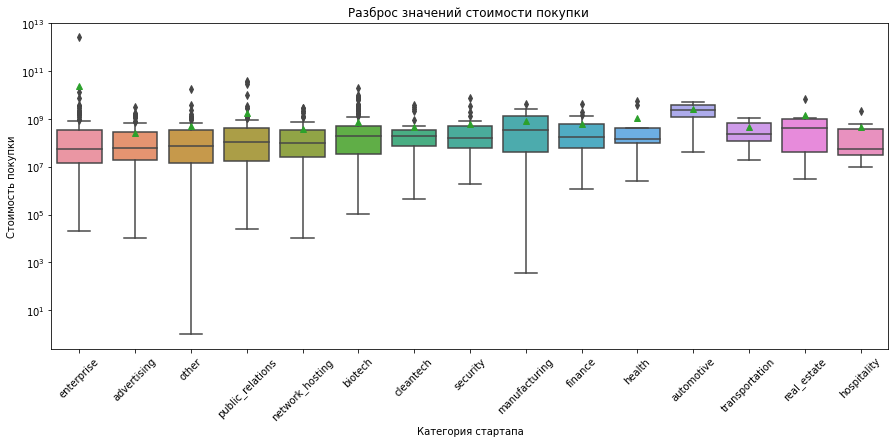

In [148]:
# Построим диаграмму размаха для выделенных топ-15 категорий
plt.figure(figsize=(15, 6))
sns.boxplot(x='category_code', 
            y='price_amount', 
            data=grouped_range_temp,
            showmeans=True  # показываем среднее значение
            ).set(title = 'Разброс значений стоимости покупки ', 
                             xlabel = 'Категория стартапа', 
                             ylabel = 'Стоимость покупки'
                             )   

plt.xticks(rotation=45)
plt.gca().set_yscale('log')
plt.show()

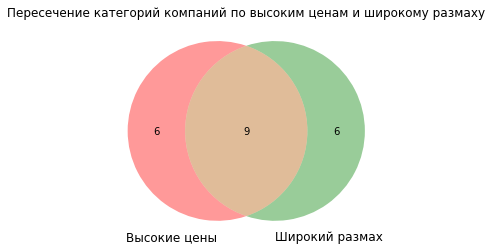

In [149]:
# посмотрим, какие категории попадают в оба варианта топ-15
grouped_cat = grouped_cat.reset_index()
grouped_range = grouped_range.reset_index()
expensive_category = set(grouped_cat['category_code'].dropna().unique())
range_category = set(grouped_range['category_code'].dropna().unique())
# Строим диаграмму Венна
venn2([expensive_category, range_category], set_labels=('Высокие цены', 'Широкий размах'))

# Отображаем график
plt.title("Пересечение категорий компаний по высоким ценам и широкому размаху")
plt.show() 

In [150]:
# Находим пересечение категорий
intersection_categories = expensive_category.intersection(range_category)

intersection_categories

{'automotive',
 'biotech',
 'cleantech',
 'finance',
 'health',
 'manufacturing',
 'real_estate',
 'security',
 'transportation'}

Были выделены категории стартапов, характеризующихся типично высокими ценами. Первая пятерка выглядит следующим образом: automotive, sports, nanotech, real_estate, manufacturing. В качестве показателя использовала медианное значение, так как на среднее большое влияние оказывают выбросы. На графиках изображала топ-15, так как в промежутке между топ-5 и топ-15 плавно изменяется средняя стоимость, поэтому топ-10 выделять мне показалось менее логичным. А топ-5 как будто предоставляет маленький выбор.

Также крупным инвесторам могут быть интересны категории стартапов со значительным разбросом цен. В качестве разброса использовала разницу между 90-м и 10-м процентилями. По этому показателю тоже был выделен топ-15 категорий. Первые пять позиций в этом рейтинге заняли следующие категории: automotive, health, real_estate, manufacturing, enterprise. Как можно заметить, топ-5 пересекаются и можно выделить три категории стартапов: automotive, real_estate и manufacturing. Если посмотреть на пересечения двух вариантов топ-15, то к повторяющимся категориям надо добавить следующие: biotech, cleantech, finance, health, security, transportation. 


### Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [151]:
filtered_company_df['funding_rounds'].unique()

<IntegerArray>
[3, 0, 1, 5, 2, 7, 4, 6, 8, 10, 9, 13, 11, 15, 14, 12]
Length: 16, dtype: Int64

In [152]:
filtered_company_df['funding_rounds'].value_counts()

1     20534
0      9040
2      6142
3      2662
4      1216
5       600
6       249
7       147
8        67
9        46
10       23
11       10
13        5
12        3
15        2
14        1
Name: funding_rounds, dtype: Int64

In [153]:
filtered_company_df.groupby('status').agg({'funding_rounds': ['mean', 'median']})

funding_rounds       
                    mean median
status                         
acquired            0.52   0.00
closed              1.38   1.00
ipo                 1.93   1.00
operating           1.52   1.00

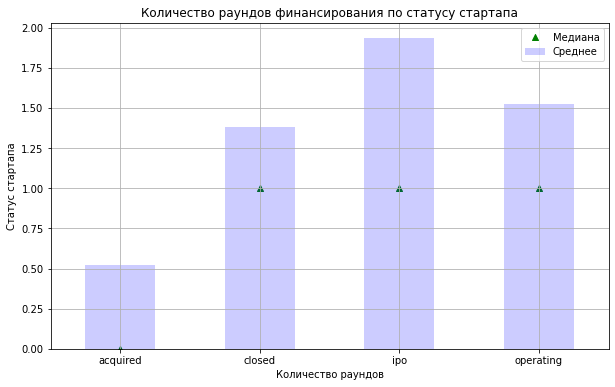

In [154]:
grouped = filtered_company_df.groupby('status')
mean_rounds = grouped['funding_rounds'].mean()
median_rounds = grouped['funding_rounds'].median()

# Построение графика
plt.figure(figsize=(10, 6))

# Горизонтальный бар-график для медианы
mean_rounds.plot(kind='bar', color='blue', alpha=0.2, label='Среднее', rot = 0)

# Добавляем точки для среднего количества раундов
plt.scatter( median_rounds.index, median_rounds, color='green', label='Медиана', marker='^')

plt.title('Количество раундов финансирования по статусу стартапа')
plt.xlabel('Количество раундов')
plt.ylabel('Статус стартапа')
plt.grid()
plt.legend()

plt.show()


Так как в столбце 'funding_rounds' датасета много нулей и они могут влиять на значения, хочу их отфильтровать и посмотреть, что получится

Компании, дожившие до ipo, прошлись через самое большое количество раундов финансирования


In [155]:
#Здесь посмотрела без нулей в 'funding_rounds'
rounds_not_null = filtered_company_df[filtered_company_df['funding_rounds'] != 0]

In [156]:
rounds_not_null.groupby('status').agg({'funding_rounds': ['mean', 'median']})

funding_rounds       
                    mean median
status                         
acquired            1.90   1.00
closed              1.38   1.00
ipo                 2.53   2.00
operating           1.64   1.00

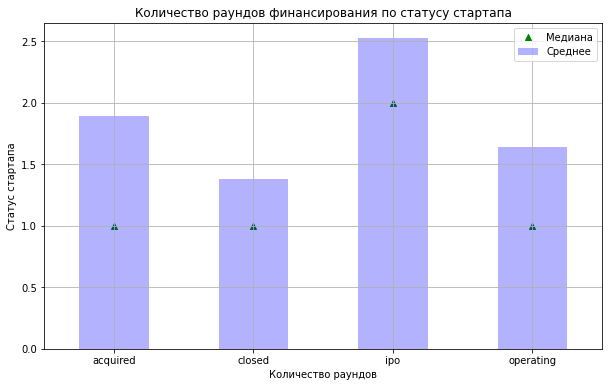

In [157]:
grouped = rounds_not_null.groupby('status')
mean_rounds = grouped['funding_rounds'].mean()
median_rounds = grouped['funding_rounds'].median()

# Построение графика
plt.figure(figsize=(10, 6))

# Горизонтальный бар-график для медианы
mean_rounds.plot(kind='bar', color='blue', alpha=0.3, label='Среднее', rot = 0)

# Добавляем точки для среднего количества раундов
plt.scatter( median_rounds.index, median_rounds, color='green', label='Медиана', marker='^')

plt.title('Количество раундов финансирования по статусу стартапа')
plt.xlabel('Количество раундов')
plt.ylabel('Статус стартапа')
plt.grid()
plt.legend()

plt.show()

Таким образом было показано, что компании, дожившие до ipo, прошлись через самое большое количество раундов финансирования. До фильтрования нулевых значений в funding_rounds среднее значение составляло 1.93, тогда как для статусов acquired, closed и operating показатели составляли  0.52, 1.38 и 1.52 соответственно. После фильтрования нулей распределение среднего числа раундов финансирования для разных статусов было следующим: acquired - 1.90, closed - 1.38, ipo -	2.53, operating -	1.64. 


## Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

**Целью** представленного исследования была подготовка и проверка датасетов, содержащих информацию о стартапах и инвестициях в них, для финансовой компании, которая планирует войти на инвестиционный рынок с целью покупок и перепродаж стартапов. 

Предоставленные данные были предварительно изучены на наличие пропусков, дубликатов и на предмет соответствия типов данных. В процессе **предобработки** была обнаружена тенденция к увеличению числа раундов финансирования и уменьшения медианной суммы одного раунда. Посмотрели на информацию о сотрудниках стартапов. При использованном в работе разбиении стартапов на группы по численности коллектива, зависимости полноты сведений о сотрудниках от размера компаний обнаружено не было. Также были проверены некоторые столбцы, встречающиеся в разных таблицах, на предмет содержания идентичной информации. Основное, что было выяснено в процессе предобработки данных - одна из таблиц была получена коллегами ранее за счет объединения двух. Мы ее разъединили. 

Сам процесс **исследовательского анализа данных** состоял из нескольких этапов. 
 - На первом этапе мы получили список из более чем 40 тыс. компаний, которые могут считаться лояльными к смене владельца. 
 - Было посчитано медианное значение общего размера финансирования одной компании. После удаления нулей оно составило 2,564,500.00.  
 - Были обнаружены компании, которые были проданы за 0-1 доллар, но у них был ненулевой общий объём финансирования. Верхняя и нижняя границы объема финансирования для таких компаний составила 35673062.5 и 0 соответственно; среднее значение - 144,679,204.03 медианное - 6,000,000.00.
 - Компания дожившие до ipo, прошлись через самое большое количество раундов финансирования
 - Был выделен топ-15 категорий стартапов, характеризующихся типично высокими ценами и топ-15 категорий стартапов, характеризующихся значительным разбросом цен. В пересечении двух полученных топ-15 находятся следующие категории: automotive, real_estate, manufacturing, biotech, cleantech, finance, health, security, transportation. При этом первые три категории automotive, real_estate, manufacturing явные фавориты в обоих топах. 